In [4]:

# ppl_plots = {}
# for k in ['Llama3-8B', 'Llama2-7B', 'Llama2-13B', 'Llama3.2-3B']:
#     save_path = f'./bit_plot_data/{k}.json'
#     with open(save_path, 'r') as f:
#         data = json.load(f)
#     ppl_plots[k] = data

# Read

In [5]:
# PPL
import glob
import json
import re


path_list = [
    # '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Meta-Llama-3-8B/ql_qmap22/uniform0',
    # '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Meta-Llama-3-8B/ql_qmap22/uniform0.3',
    # '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Meta-Llama-3-8B/ql_qmap22/uniform0.5',
    # '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Meta-Llama-3-8B/ql_qmap22/uniform0.7',
    # '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Meta-Llama-3-8B/ql_qmap22/uniform1',
    # '/workspace/Weight_compression/hf_model_comp_results/handcraft/meta-llama--Meta-Llama-3-8B/webp',
    # '/workspace/Weight_compression/hf_model_comp_results/handcraft/meta-llama--Llama-2-7b-hf/webp',
    # '/workspace/Weight_compression/hf_model_comp_results/handcraft/meta-llama--Llama-2-13b-hf/webp',
    # '/workspace/Weight_compression/hf_model_comp_results/handcraft/meta-llama--Meta-Llama-3-8B/jepg_scaleh',
    # '/workspace/Weight_compression/hf_model_comp_results/handcraft/meta-llama--Llama-2-7b-hf/webp_scaleh'
    # '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Meta-Llama-3-8B/scaleH_std_ldlq128_scale_cond(col)/size128_encdim2048_M256'
    '/workspace/Weight_compression/hf_model_comp_results/qtip/llama3_8b/ft1_'
    '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Meta-Llama-3-8B/scaleH_std_ldlq128_scale_cond(col)_uniform31.6/test2_size128_encdim2048_M256'
]
path_list = [
    f'/workspace/Weight_compression/hf_model_comp_results/meta-llama--Meta-Llama-3-8B/scaleH_std_ldlq128_scale_cond(col)_uniform31.6/test{i}_size128_encdim2048_M256' for i in [0.01, 0.1, 0.5, 1, 2, 10]
]
for path in path_list:
    print('/'.join(path.split('/')[-2:]))
    listdir = glob.glob(f'{path}/*result.json')
    # listdir = glob.glob(f'{path}/**/*result.json', recursive=True)
    # listdir = glob.glob(f'{path}/*results.json')
    # listdir = glob.glob(f'{path}/*ppl_results.json')
    
    # listdir = [l for l in listdir if 'gs128' in l]
    print(listdir[:1])
    c4ppl = []
    wikippl = []
    ptbppl = []
    bits = []
    bpp = []
    for file in listdir:        
        with open(file, 'r') as f:
            results = json.load(f)            
            try:
                bpp.append(results['bpp_loss'])
                # bpp.append(results['bpp'])
            except:
                # bit = re.search(r'w(\d+)', file.lower()).group(1) 
                # bit = re.search(r'qtip-(\d+)', file.lower()).group(1)
                # bit = re.search(r'8b_(\d+)', file.lower()).group(1)
                # bit = re.search(r'8b_(\d+)', file.lower()).group(1)
                bit = re.search(r'(\d+)\s*bit', file.lower()).group(1)
                bits.append(int(bit))
            
            try:
                if 'ppl' in results.keys(): wikippl.append(results['ppl']['wikitext2'])
                else: wikippl.append(results['wikitext2'])
            except:
                pass
            try:
                if 'ppl' in results.keys(): c4ppl.append(results['ppl']['c4'])
                else: c4ppl.append(results['c4'])
            except:
                pass
            try:
                if 'ppl' in results.keys(): ptbppl.append(results['ppl']['ptb'])
                else: ptbppl.append(results['ptb'])
            except:
                pass
            
    if bpp != []:
        sorted_indices = sorted(range(len(bpp)), key=lambda i: bpp[i])
        bpp = [bpp[i] for i in sorted_indices]
    elif bits != []:
        sorted_indices = sorted(range(len(bits)), key=lambda i: bits[i])
        bits = [bits[i] for i in sorted_indices]
        
    if wikippl != []:
        wikippl = [wikippl[i] for i in sorted_indices]
    if c4ppl != []:
        c4ppl = [c4ppl[i] for i in sorted_indices]
    if ptbppl != []:
        ptbppl = [ptbppl[i] for i in sorted_indices]
    print("'bpp' : ", bits, ',')
    print("'bpp' : ", bpp, ',')
    print("'ppl_wikitext2' : ", wikippl, ',')
    print("'ppl_c4' : ", c4ppl, ',')
    print("'ppl_ptb' : ", ptbppl, ',')

    # listdir = glob.glob(f'{path}/**/*.json', recursive=True)
    listdir = glob.glob(f'{path}/*.json', recursive=False)
    listdir = [f for f in listdir if 'zeroshot_results' in f]
    # listdir = [l for l in listdir if 'gs128' in l]

    try:
        acc = []
        bits = []
        lmbda = []
        for file in listdir:
        # for i in [0]:
            # file = '/workspace/Weight_compression/hf_model_comp_results/spinquant/8B/8B_w4a16_zeroshot_results.json'
            # file = '/workspace/Weight_compression/Wparam_dataset/hf_model/lmsys--vicuna-7b-v1.5_zeroshot_results0.4.4.json'
            with open(file, 'r') as f:
                results = json.load(f)
                try: 
                    lmbda_values = re.search(r'lmbda(\d+)', file).group(1)
                    lmbda.append(int(lmbda_values))
                except:
                    # bit = re.search(r'w(\d+)', file).group(1)
                    # bit = re.search(r'8b_(\d+)', file).group(1)
                    # bit = re.search(r'qtip-(\d+)', file.lower()).group(1)
                    # bit = re.search(r'(\d+)\s*bit', file.lower()).group(1)
                    bit = re.search(r'_q(\d+)', file.lower()).group(1)
                    bits.append(int(bit))                

                mean = 0
                for task in ['arc_challenge', 'arc_easy', 'boolq', 'piqa', 'winogrande']:
                    mean += results['results'][task]['acc,none']
                    # mean += results['results'][task]['acc']
                mean /= 5
                acc.append(mean)
                
        if lmbda != []:
            sorted_indices = sorted(range(len(lmbda)), key=lambda i: lmbda[i])
            lmbda = [lmbda[i] for i in sorted_indices]
        elif bits != []:
            sorted_indices = sorted(range(len(bits)), key=lambda i: bits[i])
            bits = [bits[i] for i in sorted_indices]
        acc = [acc[i] for i in sorted_indices]

        print("'bpp' : ", bits, ',')
        print("'lmbda' : ",lmbda, ',')
        print("'zeroshot' : ",acc, ',')
    except Exception as e:
        print(e)

scaleH_std_ldlq128_scale_cond(col)_uniform31.6/test0.01_size128_encdim2048_M256
['/workspace/Weight_compression/hf_model_comp_results/meta-llama--Meta-Llama-3-8B/scaleH_std_ldlq128_scale_cond(col)_uniform31.6/test0.01_size128_encdim2048_M256/lmbda20_result.json']
'bpp' :  [] ,
'bpp' :  [18.238238552979265, 21.6997694116838] ,
'ppl_wikitext2' :  [1673511.75, 1318620.0] ,
'ppl_c4' :  [] ,
'ppl_ptb' :  [] ,
list index out of range
scaleH_std_ldlq128_scale_cond(col)_uniform31.6/test0.1_size128_encdim2048_M256
['/workspace/Weight_compression/hf_model_comp_results/meta-llama--Meta-Llama-3-8B/scaleH_std_ldlq128_scale_cond(col)_uniform31.6/test0.1_size128_encdim2048_M256/lmbda20_result.json']
'bpp' :  [] ,
'bpp' :  [7.7165467664688965, 8.726399871359508] ,
'ppl_wikitext2' :  [2133321.5, 293383.875] ,
'ppl_c4' :  [] ,
'ppl_ptb' :  [] ,
list index out of range
scaleH_std_ldlq128_scale_cond(col)_uniform31.6/test0.5_size128_encdim2048_M256
['/workspace/Weight_compression/hf_model_comp_results/meta

# Plot

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# None 값을 np.nan으로 대체
def replace_none_with_nan(data):
    return np.array([np.nan if val is None else val for val in data])

plot_name = [
        # 'RTNg128',
        # 'SeedLM',
        # 'GPTQ',
        # 'AWQ',
        # 'OMNIQ',
        # 'AQLM',
        # 'QUIP#',
        # 'QUIP#_no_ft',
        # 'QTIP',
        # 'QTIP`',
        # 'QTIP_no_ft',
        # 'SpinQ',
        # 'Ours_base',
        # 'Ours_ql',
        # 'NWC_ql_channelwise_scale',
        # 'NWC_ql_layerwise_scale',
        # 'Ours_ql_ldlq',
        # 'NWC_RHT_scaled',
        # 'NWC_RHT_scaled_layerft',
        # 'NWC_ql_tuned_ldlq_ft',
        # 'NWC_ql_ldlq128_rnorm_ft',
        # 'NWC_ql_ldlq_lnorm',
        # 'NWC_ql_tuned',
        # 'NWC_ql',
        # 'NWC_ql_random_seq16_2',
        # 'NWC_ql_no_norm',
        # 'NWC_RHT_scaled_ldlq',
        # 'NWC_global_ql',
        # 'NWC_global_ql_v2',
        # 'Ours_ft',
        # 'Ours',
        # 'NWC',
        # 'NWC_lwise_norm',
        # '+code_optim',
        # '+code_optim(dec train)',
        # 'NWC_ql_M32',
        # 'NWC_ql_M32_lwise_norm',
        # 'NWC_ql_M32_lwise_norm(trained)',
        # 'NWC_ql_M32_cwise_norm',
        # 'NWC_ql_M32_cwise_norm(trained)',
        # 'NWC_ql(8b)',
        # 'NWC_qmap',
        # 'NWC_qmap_optim',
        # 'NWC_ql(8b_7b_droplast)',
        # 'NWC_ql(8b_clip)',
        # 'NWC_ql(7b_droplast)',
        # 'NWC_ql(gaussian)',
        # 'NWC_ql(gaussian_7b_droplast)',
        # 'NWC_ql(gaussian_8b)',
        # 'NWC_ql(8b_7b)',
        # 'NWC_ql(8b_shuffle)',
        # 'NWC_ql(8b_shuffle_7b_shuffle)',
        # 'NWC_ql(8b_shuffle_7b)',
        # 'NWC_ql_col_norm(8b)',
        # 'NWC_ql_row_norm(8b)',
        # 'NWC_ql(8b+7b)',
        # 'NWC_ql(8b+7b_modelnorm)',
        # 'NWC_ql(8b_kde)',
        # 'NWC_ql_code_optim100',
        # 'NWC_ql_code_optim100(sga)',
        # 'NWC_ql_code_qs_optim100',
        # 'NWC_ql_rnorm_code_optim200',
        # 'NWC_ql_rnorm_code_optim200(init)',
        # 'NWC_ql_rnorm_code_optim200(round)',
        # 'NWC_ql_rnorm_code_optim200(sga)',
        # 'NWC_ql_code_qs_optim_lnorm',
        # 'NWC_ql_code_optim_lnorm',
        # 'NWC_ql_lnorm',
        # 'NWC_ql_qs_optim_lnorm',
        # 'ql',
        # 'ql_lnorm',
        # 'ql_cnorm',
        # 'ql_rnorm',
        # 'ql_rnorm_M32',
        # 'ql_gaussian_rnorm',
        # 'ql_rnorm_trained',
        # 'scaleh_ql0',
        # 'scaleh_ql1',
        # 'scaleh_ql01',
        'ql_ldlq128_rnorm',
        'scaleh_ldlq128',
        'scaleh_ldlq128_ql01',
        'scaleh_std_ldlq128',
        # 'scaleh_std_ldlq128_2048',
        # 'scaleHinv_std_ldlq128',
        # 'scaleh_ql2',
        # 'scaleh_ql3',
        'scaleH_scale_cond'
        # 'ql_Q2',
        # 'NWC_ql_Q8',
        # 'NWC_ql_Q16',
        # 'ql_uniform0',
        # 'ql_uniform1',
        # 'ql_uniform2',
        # 'ql_uniform3',
        # # 'qmap2',
        # 'qmap22_uniform0',
        # 'qmap22_uniform0.3',
        # 'qmap22_uniform0.5',
        # 'qmap22_uniform0.7',
        # 'qmap22_uniform1',
        # 'qmap2_optim',
        # 'qmap3'
        # 'qmap3_uniform0',
        # 'qmap3_uniform0.5',
        # 'qmap3_uniform1',
        # 'AWQ',
        # 'QTIP_no_ft',
        # 'QTIP_no_e2e',
        # 'NWC_ql_ldlq128_rnorm_ft',
        # 'NWC_ql_ldlq128_rnorm',
        # 'NWC_ql_ldlq128_rnorm',
        # 'jpeg99',
        # 'jpeg98',
        # 'jpeg97',
        # 'jpeg96',
        # 'jpeg128',
        # 'jpeg128_scaleh',
    ]

plot_labels = [
    'JPEG',
    'JPEG_scaled',
]
import matplotlib.cm as cm
# cmap = cm.get_cmap('tab20b', len(ppl_plot))  
# cmap = cm.get_cmap('tab10', 5)
cmap = cm.get_cmap('tab10')
# cmap = cm.get_cmap('viridis')
# colors = {k: cmap(i) for i, k in enumerate(plot_name)}


plot_labels = plot_name if len(plot_labels) != len(plot_name) else plot_labels
colors = np.arange(len(plot_name))
line_styles = ['-']*len(plot_name)

mse_plot = [
    ]

k_order = 1
bit_split = 5

plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# for m_name, plots in ppl_plots.items():
# for m_name in ['Llama3-8B', 'Llama2-7B', 'Llama2-13B', 'Vicuna_7B']:
# for m_name in ['Vicuna_7B']:
for m_name in ['Llama3-8B', 'Llama2-7B', 'Llama2-13B']:
    plots = ppl_plots[m_name]
    # for plot_key in ['ppl_wikitext2', 'ppl_c4', 'ppl_ptb', 'zeroshot']:
    for plot_key in ['ppl_wikitext2', 'ppl_c4', 'zeroshot']:
        fig, axs = plt.subplots(1, 2, figsize=(20, 6))
        # fig, axs = plt.subplots(1, 1, figsize=(8, 4))
        for k, l, color, line in zip(plot_name, plot_labels, colors, line_styles):
            try:
                v = plots[k]
                if k in  plot_name:  
                    bpp = replace_none_with_nan(v['bpp'])
                    ppl = replace_none_with_nan(v[plot_key])

                    # 곡선 피팅
                    mask = np.isfinite(ppl)
                    mask = ppl < 2000
                    x_smooth = np.linspace(bpp[mask].min(), bpp[mask].max(), 500)
                    spline = make_interp_spline(bpp[mask], ppl[mask], k=k_order)  # 3차 스플라인
                    y_smooth = spline(x_smooth)

                    if 'NWC' in k or 'Ours' in k or 'ql_' in k:
                        alpha = 1
                        marker='*'
                        ms = 100
                    else:
                        marker='o'
                        alpha = 1
                        ms = 15
                    if 'jpeg' in k or 'webp' in k:
                        line = '-.'                        
                        
                    # axs[0].plot(x_smooth, y_smooth, linestyle=line, label=l, alpha=alpha)
                    # axs[0].scatter(bpp[mask], ppl[mask], marker=marker, s=ms, alpha=alpha)

                    # axs[1].plot(x_smooth[x_smooth>bit_split], y_smooth[x_smooth>bit_split],
                    #             linestyle=line, label=l, alpha=alpha)
                    # axs[1].scatter(bpp[mask & (bpp>bit_split)],
                    #             ppl[mask & (bpp>bit_split)],
                    #             marker=marker, s=ms, alpha=alpha)
                    # axs[0].plot(x_smooth[x_smooth <= bit_split], y_smooth[x_smooth <= bit_split], linestyle=line, color=cmap(color), label=l, alpha = alpha)
                    axs[0].plot(x_smooth, y_smooth, linestyle=line, color=cmap(color), label=l, alpha = alpha)
                    # axs[0].scatter(bpp[mask][bpp[mask] <= bit_split], ppl[mask][bpp[mask] <= bit_split], color=cmap(color), marker=marker, s = ms, alpha = alpha)
                    axs[0].scatter(bpp[mask], ppl[mask], color=cmap(color), marker=marker, s = ms, alpha = alpha)

                    axs[1].plot(x_smooth[x_smooth > bit_split], y_smooth[x_smooth > bit_split], linestyle=line, color=cmap(color), label=l, alpha = alpha)
                    axs[1].scatter(bpp[mask][bpp[mask] > bit_split], ppl[mask][bpp[mask] > bit_split], color=cmap(color), marker=marker,  s = ms, alpha = alpha)
            except Exception as e:
                print(e)
                pass
        for ax in axs:
            try:
                ax.axhline(y=plots['FP16'][plot_key], color='r', linestyle='--', label='FP16')
            except:
                pass
            ax.set_xlabel('Bits per element')
            ax.legend()
            ax.grid(True, linestyle='--', alpha = 0.5)

        # axs[0].set_title(f'{m_name} {plot_key.split("_")[-1].upper()} (bits < {bit_split})')
        print(f'{m_name} {plot_key.split("_")[-1].upper()}')
        # axs[0].set_title(f'{m_name} {plot_key.split("_")[-1].upper()}')
        # axs[1].set_title(f'{m_name} {plot_key.split("_")[-1].upper()} (bits > {bit_split})')
        # axs[1].set_title(f'{m_name} {plot_key.split("_")[-1].upper()}')
        
        if 'ppl' in plot_key:
            axs[0].set_ylabel('PPL. (↓)')
            axs[1].set_ylabel('PPL. (↓)')
            # axs[0].set_xlim(None, 8)            
            # axs[0].set_yscale('log')            
            # axs[1].set_xlim(2.5, 6)            
            # if 'wiki' in plot_key:
                # axs[1].set_ylim(6.7, 7.5) # vicuna
                # axs[1].set_ylim(6.7, 9) # 8b
                # axs[0].set_ylim(6, 9) # 8b
            # if 'c4' in plot_key:
                # axs[1].set_ylim(None, 16) # 8b
            # if 'ptb' in plot_key:
            #     axs[0].set_ylim(26.5, 29)
        else:
            axs[0].set_ylabel('ACC.')
            axs[1].set_ylabel('ACC.')
            axs[0].set_xlim(None, 8)            
            
            # axs[0].set_ylim(0.6, None)
            # # axs[0].set_xlim(2.5, 6)
        
        handles, labels = axs[0].get_legend_handles_labels()
        unique_labels = dict(zip(labels, handles))  # 중복 제거

        # 범례를 fig 밖으로 배치 (중복 제거된 항목만)
        # fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5)
        # fig.legend(unique_labels.values(), unique_labels.keys(), loc='upper center', bbox_to_anchor=(1, 0.9), ncol=1)
        # plt.suptitle(m_name)
        # plt.legend()
        plt.show()

/tmp/ipykernel_990711/3044322487.py:137: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10')


NameError: name 'ppl_plots' is not defined

/tmp/ipykernel_990711/984031009.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10')


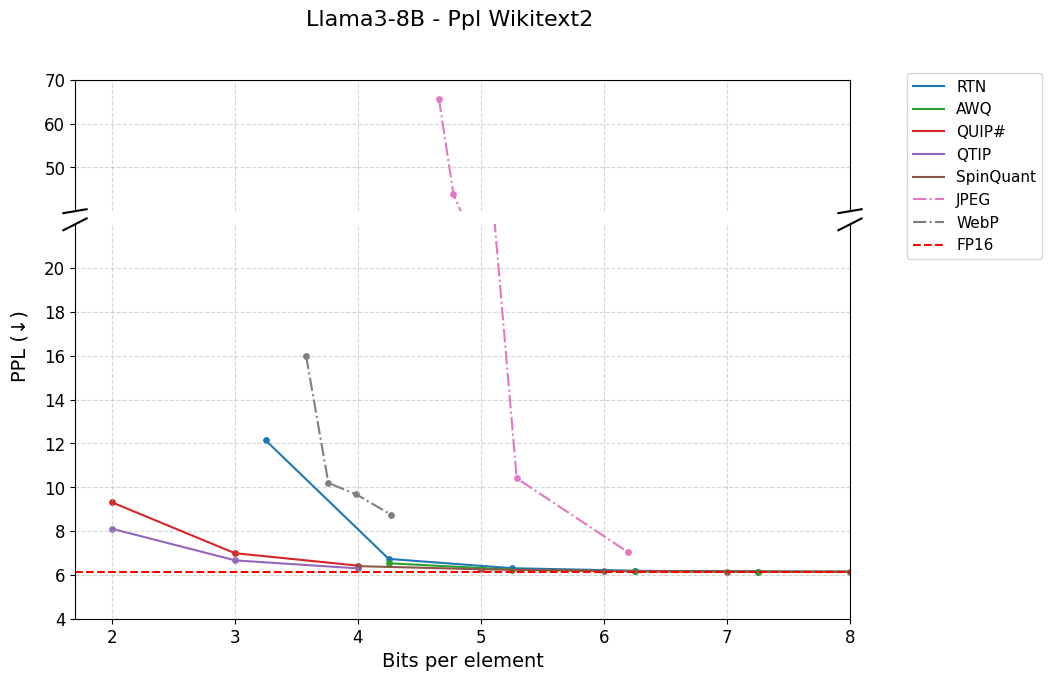

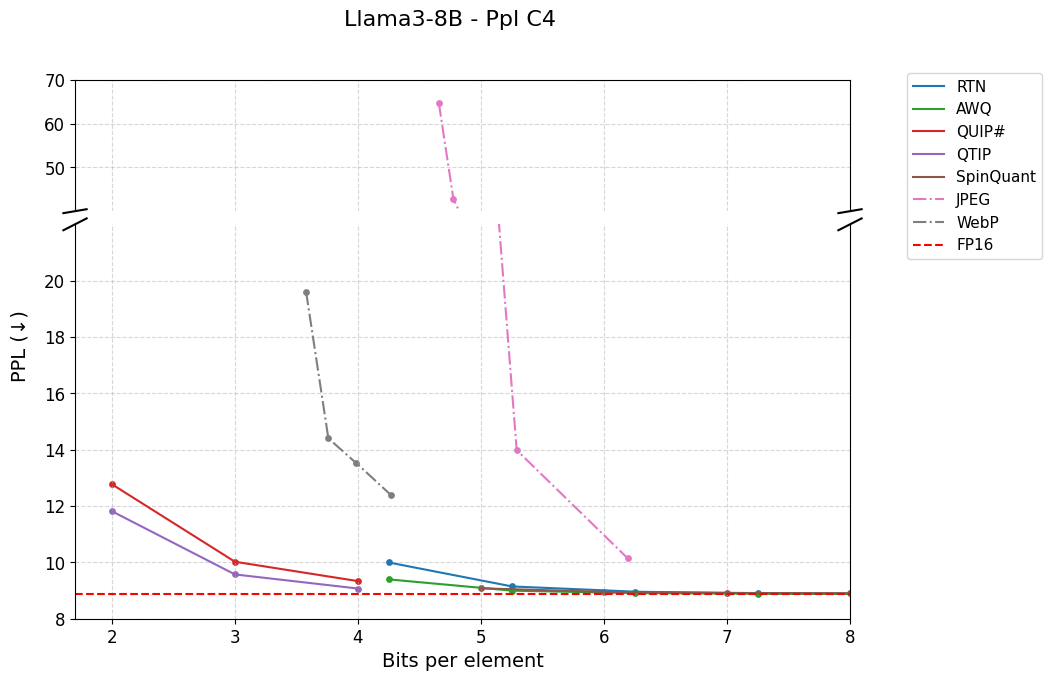

In [12]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import matplotlib.cm as cm
from matplotlib.ticker import MaxNLocator # MaxNLocator를 import 합니다.
from matplotlib.ticker import MultipleLocator

def replace_none_with_nan(data):
    return np.array([np.nan if val is None else val for val in data])

# plot_name = [
#         'RTNg128', 'SeedLM', 'GPTQ', 'AWQ', 'OMNIQ',
#         'QUIP#', 'QTIP', 'SpinQ', 'jpeg128', 'webp128'
# ]
# plot_labels = [
#         'RTN', 'SeedLM', 'GPTQ', 'AWQ', 'OMNIQ',
#         'QUIP#', 'QTIP', 'SpinQuant', 'JPEG', 'WebP'
# ]

plot_name = [
        'RTNg128', 'GPTQ', 'AWQ',
        'QUIP#', 'QTIP', 'SpinQ', 'jpeg128', 'webp128'
]
plot_labels = [
        'RTN', 'GPTQ', 'AWQ', 
        'QUIP#', 'QTIP', 'SpinQuant', 'JPEG', 'WebP'
]


cmap = cm.get_cmap('tab10')
plot_labels = plot_name if len(plot_labels) != len(plot_name) else plot_labels
colors = np.arange(len(plot_name))
line_styles = ['-'] * len(plot_name)
k_order = 1

# Matplotlib 전역 설정
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 11


for m_name in ['Llama3-8B']:
# for m_name in ['Llama2-7B']:
# for m_name in ['Llama2-13B']:
    # 'ppl_plots' 변수가 실제 데이터로 채워져 있다고 가정합니다.
    if m_name not in ppl_plots: continue
    plots = ppl_plots[m_name]

    for plot_key in ['ppl_wikitext2', 'ppl_c4']:
        if plot_key not in list(plots.values())[0]: continue

        # 1. 두 개의 서브플롯을 위아래로 생성 (x축 공유)
        # figsize를 세로로 긴 형태로 조정하고, 서브플롯 간 간격을 좁힙니다.
        # fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 7),
                            #    gridspec_kw={'height_ratios': [1.5, 1]}) ## 13B
                            #    gridspec_kw={'height_ratios': [1, 1]}) ## 13B
                               gridspec_kw={'height_ratios': [1, 3]}) ## 8B
        fig.subplots_adjust(hspace=0.05)

        # 2. Y축 분할 지점 설정 (데이터에 맞게 이 값을 조절하세요)
        if 'ppl' in plot_key:
            # y_break_low, y_break_high = 8, 10 # 13B c4
            # y_break_low, y_break_high = 7, 8  # 13B wiki
            # y_break_low, y_break_high = 8, 35 # 7B wiki
            # y_break_low, y_break_high = 10, 35 # 7B c4
            y_break_low, y_break_high = 18, 40 # 8B wiki
            y_break_low, y_break_high = 22, 40 # 8B c4
        else: # ACC의 경우
            y_break_low, y_break_high = 0.7, 0.8

        # 각 서브플롯의 y축 범위 설정
        # ax1은 위쪽(값이 큰 부분), ax2는 아래쪽(값이 작은 부분)
        # 데이터의 min/max 값을 보고 동적으로 설정하거나, 고정값 사용 가능
        all_ppl_values = np.concatenate([replace_none_with_nan(v[plot_key]) for k, v in plots.items() if k in plot_name and plot_key in v])
        all_ppl_values = all_ppl_values[np.isfinite(all_ppl_values)]
        mask = all_ppl_values < 2000
        all_ppl_values = all_ppl_values[mask]

        # ax1.set_ylim(np.max(all_ppl_values) * 1.05 - y_break_low/3, np.max(all_ppl_values) * 1.05)
        ax1.set_ylim(y_break_high, np.max(all_ppl_values) * 1.05)
        ax2.set_ylim(np.min(all_ppl_values) * 0.95, y_break_low)
        ax1.set_xlim(1.7, 8)  # x축 범위 설정 (bits per element)
        ax1.set_xlim(1.7, 8)  # x축 범위 설정 (bits per element)
        
        # ax1.yaxis.set_major_locator(MultipleLocator(2)) 
        # ax2.yaxis.set_major_locator(MultipleLocator(2))
        # ax1.yaxis.set_major_locator(MaxNLocator(prune='lower'))
        # ax2.yaxis.set_major_locator(MaxNLocator(prune='upper'))
        
        # 2. figure를 한번 그려서 실제 눈금 위치를 계산시킵니다.
        fig.canvas.draw()

        # 3. 계산된 눈금 목록을 가져와서 경계 값을 수동으로 제거합니다.
        # 위쪽 플롯(ax1)의 가장 아래 눈금을 제거
        yticks1 = ax1.get_yticks()
        if len(yticks1) > 1:
            ax1.set_yticks(yticks1[1:])

        # 아래쪽 플롯(ax2)의 가장 위 눈금을 제거
        yticks2 = ax2.get_yticks()
        if len(yticks2) > 1:
            ax2.set_yticks(yticks2[:-1])
        ## <<< 수정 구간 끝 >>>

        
        # 3. 데이터를 각 축에 모두 플로팅
        for k, l, color, line in zip(plot_name, plot_labels, colors, line_styles):
            try:
                v = plots[k]
                if k in plot_name:
                    bpp = replace_none_with_nan(v['bpp'])
                    ppl = replace_none_with_nan(v[plot_key])

                    mask = np.isfinite(bpp) & np.isfinite(ppl)
                    mask = ppl < 2000
                    if not np.any(mask): continue # 유효한 데이터가 없으면 건너뛰기

                    # 곡선 피팅
                    # if np.sum(mask) > k_order:
                    #     x_smooth = np.linspace(bpp[mask].min(), bpp[mask].max(), 300)
                    #     spline = make_interp_spline(bpp[mask], ppl[mask], k=k_order)
                    #     y_smooth = spline(x_smooth)
                    # else: # 데이터 포인트가 충분하지 않으면 그냥 직선으로 연결
                    #     x_smooth = bpp[mask]
                    #     y_smooth = ppl[mask]

                    x_smooth = np.linspace(bpp[mask].min(), bpp[mask].max(), 300)
                    spline = make_interp_spline(bpp[mask], ppl[mask], k=k_order)
                    y_smooth = spline(x_smooth)

                    marker, alpha, ms = ('o', 1, 15)
                    if 'NWC' in k or 'Ours' in k or 'ql_' in k:
                        marker, ms = ('*', 100)
                    if 'jpeg' in k or 'webp' in k:
                        line = '-.'

                    # 두 축 모두에 동일한 데이터를 플롯
                    ax1.plot(x_smooth, y_smooth, linestyle=line, color=cmap(color), label=l, alpha=alpha)
                    ax2.plot(x_smooth, y_smooth, linestyle=line, color=cmap(color), label=l, alpha=alpha)
                    ax1.scatter(bpp[mask], ppl[mask], color=cmap(color), marker=marker, s=ms, alpha=alpha)
                    ax2.scatter(bpp[mask], ppl[mask], color=cmap(color), marker=marker, s=ms, alpha=alpha)

            except Exception as e:
                # print(f"Error plotting {k}: {e}")
                pass

        # 4. 축 분할 시각적 효과 추가
        # 위쪽 플롯(ax1)의 아래쪽 축선과 아래쪽 플롯(ax2)의 위쪽 축선을 숨김
        ax1.spines['bottom'].set_visible(False)
        ax2.spines['top'].set_visible(False)
        ax1.tick_params(axis='x', which='both', bottom=False) # 위쪽 플롯의 x축 눈금 제거
        # ax2.tick_params(labeltop=False) # 혹시 모를 위쪽 라벨 제거

        # 대각선 그리기
        d = .015  # 대각선의 크기
        kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
        ax1.plot((-d, +d), (-d, +d), **kwargs)        # 왼쪽 아래
        ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # 오른쪽 아래

        kwargs.update(transform=ax2.transAxes)
        ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # 왼쪽 위
        ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # 오른쪽 위

        # 5. 라벨 및 범례 설정
        fig.suptitle(f'{m_name} - {plot_key.replace("_", " ").title()}', fontsize=16)
        ax2.set_xlabel('Bits per element')
        fig.text(0.06, 0.5, 'PPL (↓)' if 'ppl' in plot_key else 'ACC (↑)',
                 va='center', rotation='vertical', fontsize=14)

        try:
            fp_val = plots['FP16'][plot_key]
            ax1.axhline(y=fp_val, color='r', linestyle='--', label='FP16')
            ax2.axhline(y=fp_val, color='r', linestyle='--', label='FP16')
        except:
            pass
        
        
        # if 'ppl' in plot_key:
        #     axs[0].set_ylabel('PPL. (↓)')
        #     axs[1].set_ylabel('PPL. (↓)')
        #     axs[0].set_xlim(None, 8)            
        #     # axs[0].set_yscale('log')            
            # axs[1].set_xlim(2.5, 6)            
            # if 'wiki' in plot_key:
                # axs[1].set_ylim(6.7, 7.5) # vicuna
                # axs[1].set_ylim(6.7, 9) # 8b
                # axs[0].set_ylim(6, 9) # 8b
            # if 'c4' in plot_key:
                # axs[1].set_ylim(None, 16) # 8b
            # if 'ptb' in plot_key:
            #     axs[0].set_ylim(26.5, 29)
        

        ax1.grid(True, linestyle='--', alpha=0.5)
        ax2.grid(True, linestyle='--', alpha=0.5)

        # 범례를 하나로 합쳐서 그림 바깥에 표시
        handles, labels = ax1.get_legend_handles_labels()
        unique_labels = dict(zip(labels, handles))
        fig.legend(unique_labels.values(), unique_labels.keys(),
                   loc='upper right', bbox_to_anchor=(1.1, 0.9))

        plt.show()
        ## <<< 주요 변경 사항 끝 >>>

# Llama3 8B

In [7]:
## llama3-8
import numpy as np
ppl_plots = {}
plots = {}

plots['AWQ'] = {}
plots['AWQ']['bpp'] = [2.25, 3.25, 4.25, 5.25, 6.25, 7.25, 8.25, 9.25][2:]
plots['AWQ']['ppl_wikitext2'] = [1706217.75, 8.243, 6.531, 6.237, 6.157, 6.141, 6.138, 6.135891437530518][2:]
plots['AWQ']['ppl_c4'] = [None, None, 9.396510124206543, 8.995973587036133, 8.906269073486328, 8.887651443481445, 8.881821632385254, 8.881292343139648][2:]
plots['AWQ']['mse'] = [23,21,18,189,21,18, 23][2:]
plots['AWQ']['zeroshot'] = [None, None, 0.7234130858684871, 0.7298931522879416, 0.7268199977535291, 0.7275232348388868, 0.7282946139046595, 0.7278560248829934][2:]

plots['OMNIQ'] = {}
plots['OMNIQ']['bpp'] = [None]
plots['OMNIQ']['ppl_wikitext2'] = [None]

plots['QUIP#_no_ft'] = {}
plots['QUIP#_no_ft']['bpp'] = [2, 3, 4]
plots['QUIP#_no_ft']['ppl_wikitext2'] = [11.754, 6.801, 6.080]
plots['QUIP#_no_ft']['ppl_c4'] = [16.809, 10.370, 8.874]

plots['QUIP#'] = {}
plots['QUIP#']['bpp'] = [2, 3, 4]
plots['QUIP#']['ppl_wikitext2'] = [9.312, 6.990, 6.424]
plots['QUIP#']['ppl_c4'] = [12.773, 10.023, 9.335]
plots['QUIP#']['zeroshot'] = [0.6597419769612316, 0.7125861995086145, 0.7213374078294685]

## e2e batch size 줄여서 돌린거
plots['QTIP'] = {}
plots['QTIP']['bpp'] = [2, 3, 4]
plots['QTIP']['ppl_wikitext2'] = [8.106,6.664,6.297]
plots['QTIP']['ppl_c4'] = [11.815123558044434, 9.572436332702637 ,9.071606636047363]
plots['QTIP']['zeroshot'] = [0.6906918015831197, 0.7226339079941553 , 0.7290387661499047]

## e2e 5, 6, 7 은 no e2e
# plots['QTIP`'] = {}
# plots['QTIP`']['bpp'] = [2, 3, 4, 5, 6, 7]
# plots['QTIP`']['zeroshot'] = [0.6906918015831197, 0.7226339079941553, 0.7290387661499047, 0.7300888652689438, 0.7317489661236138, 0.7309889642407812]
# plots['QTIP`']['ppl_wikitext2'] = [8.106,6.664,6.297, 6.219356060028076, 6.222760200500488, 6.222774982452393]
# plots['QTIP`']['ppl_c4'] = [11.815123558044434, 9.572436332702637, 9.071606636047363, 8.98123836517334, 8.982561111450195, 8.982028007507324]

# plots['QTIP'] = {}
# plots['QTIP']['bpp'] = [2]
# plots['QTIP']['ppl_wikitext2'] = [8.10886001586914]
# plots['QTIP']['ppl_c4'] = [11.34353256225586]
# plots['QTIP']['zeroshot'] = [0.6906918015831197]

plots['QTIP_no_ft'] = {}
plots['QTIP_no_ft']['bpp'] = [2,3,4,5,6,7]
plots['QTIP_no_ft']['ppl_wikitext2'] = [9.744,6.840,6.339, 6.253672122955322, 6.2546563148498535, 6.254655838012695]
plots['QTIP_no_ft']['ppl_c4'] = [None,None,None, 9.010744094848633, 9.011184692382812, 9.011035919189453]
plots['QTIP_no_ft']['zeroshot'] = [None, None, None, 0.7317278153771081, 0.7325035101081055, None]

# plots['AQLM'] = {}
# plots['AQLM']['bpp'] = [2,3,4]
# plots['AQLM']['ppl_wikitext2'] = [9.744,6.840,6.339]

plots['AQLM'] = {}
plots['AQLM']['bpp'] = [2]
plots['AQLM']['ppl_wikitext2'] = [7.761857986450195]
plots['AQLM']['ppl_c4'] = [10.8907051086425789]

plots['NWC_ql_tuned_ldlq_ft'] = {}
plots['NWC_ql_tuned_ldlq_ft']['bpp'] = [2.3503167743289954, 2.7167603686044073, 3.213820520092283, 3.9955983058457254, 4.806541982468179, 5.974153137660603]
plots['NWC_ql_tuned_ldlq_ft']['ppl_wikitext2'] = [8.618568420410156, 7.426833152770996, 6.740654945373535, 6.3390212059021, 6.201639652252197, None]
plots['NWC_ql_tuned_ldlq_ft']['ppl_c4'] = [12.045183181762695, 10.615286827087402, 9.707376480102539, 9.121989250183105, 8.955321311950684, 8.901552200317383]
plots['NWC_ql_tuned_ldlq_ft']['zeroshot'] = [0.6775462119134815, 0.700615982668705, 0.7222027238600783, 0.7278117246555829, 0.726265208255292, 0.728454528668937]

plots['NWC_ql_ldlq_lnorm'] = {}
plots['NWC_ql_ldlq_lnorm']['bpp'] = [3.9651611150461927, 4.864048294447737, 7.1424700350936785]
plots['NWC_ql_ldlq_lnorm']['zeroshot'] = [0.727139323470181, 0.729055448026720, 0.7284623222950006]
plots['NWC_ql_ldlq_lnorm']['ppl_wikitext2'] = [6.352479934692383, 6.1997599601745605, 6.148508071899414]
plots['NWC_ql_ldlq_lnorm']['ppl_c4'] = [9.145858764648438, 8.960957527160645, 8.894388198852539]

plots['SpinQ'] = {}
plots['SpinQ']['bpp'] = [4, 5, 6, 7, 8, 9]
plots['SpinQ']['zeroshot'] = [0.715325472636504, 0.7306027344648212, 0.7315773049339473, 0.7287862681657514, 0.7290385141834816, 0.7296742732998392]
plots['SpinQ']['ppl_wikitext2'] = [6.4, 6.253126621246338, 6.177572250366211, 6.154661178588867, 6.148306846618652, 6.147614479064941]
plots['SpinQ']['ppl_c4'] = [None, 9.079610824584961, 8.951584815979004, 8.915331840515137, 8.902764320373535, 8.901545524597168]

plots['RTNg128'] = {}
plots['RTNg128']['bpp'] = [2.25, 3.25, 4.25, 5.25, 6.25, 7.25, 8.25]
plots['RTNg128']['ppl_wikitext2'] = [295954.625, 12.141, 6.731, 6.304, 6.186, 6.150, 6.140]
plots['RTNg128']['ppl_c4'] = [None, None, 9.997003555297852, 9.14610767364502, 8.958009719848633, 8.896822929382324, 8.884255409240723]
plots['RTNg128']['mse'] = [0.2619, 0.0489, 0.0107, 0.0025, 0.0006, 0.0002, 4.6240e-05]
plots['RTNg128']['zeroshot'] = [None, None, 0.7164253093662043, 0.7227695616150781, 0.7307781867642691, 0.7292357096531956, 0.7286665640440705]

plots['RTN'] = {}
plots['RTN']['bpp'] = [2, 3, 4, 5, 6, 7, 8]
plots['RTN']['ppl_wikitext2'] = [1385877.125, 2276.227, 8.537, 6.561, 6.270, 6.173, 6.149]
plots['RTN']['mse'] = [0.5205, 0.1124, 0.0253, None, 0.0015, None, 9.9967e-05]


plots['VQVAE_old'] = {}
plots['VQVAE_old']['bpp'] = [2,3,4,5,6,8] 
plots['VQVAE_old']['ppl_wikitext2'] = [801779, 110.0668, 10.7364, 7.8319, 7.6031, 7.5663]
plots['VQVAE_old']['mse'] = [0.1144, 0.0389, 0.0186, 0.0049, 0.0028, 0.0020]

plots['VQVAE'] = {}
plots['VQVAE']['bpp'] = [3, 4, 5, 6, 8]
plots['VQVAE']['ppl_wikitext2'] = [24.881,7.194, 6.470, 6.215, 6.177]
plots['VQVAE']['mse'] = [0.03701, 0.01228, 0.00365, 0.00101, 9e-5]

plots['VQVAE_idx'] = {}
plots['VQVAE_idx']['bpp'] = [3, 4, 6, 8] 
plots['VQVAE_idx']['ppl_wikitext2'] = [50.871, 7.739, None, 6.223]
plots['VQVAE_idx']['mse'] = [0.0369, 0.0192, 0.0027, 0.0010]

plots['VQVAE_idx_row'] = {}
plots['VQVAE_idx_row']['bpp'] = [3, 4, 5, 6, 7, 8] 
plots['VQVAE_idx_row']['ppl_wikitext2'] = [159.215, 7.852, None, 6.545, None, 6.166]
plots['VQVAE_idx_row']['mse'] = [0.0410, 0.0123, 0.0064, 0.0033, 0.0026, 0.0002]

plots['SeedLM'] = {}
plots['SeedLM']['bpp'] = [3, 4]
plots['SeedLM']['ppl_wikitext2'] = [10.1, 7.0]
plots['SeedLM']['mse'] = [0.0388, 0.0081]

plots['NWC_row16'] = {}
plots['NWC_row16']['bpp'] = [6.398, 8.22, 10.074, 10.108]
plots['NWC_row16']['ppl_wikitext2'] = [6.828, 6.212, 6.162, 6.158]
plots['NWC_row16']['mse'] = [0.00725, 0.00076, 0.00017, 0.00016]

plots['NWC_col128'] = {}
plots['NWC_col128']['bpp'] = [3.27539, 3.77784, 4.57791, 5.44646, 7.08356, 7.8364]
plots['NWC_col128']['ppl_wikitext2'] = [9.072, 7.492, 6.392, 6.222, 6.142, 6.140]
plots['NWC_col128']['mse'] = [0.01454, 0.00729, 0.00245, 0.00075, 8e-05, 3e-05]

plots['NWC_row128'] = {}
plots['NWC_row128']['bpp'] = [3.64225, 4.14475, 4.9485, 5.828, 7.466, 8.2165]
plots['NWC_row128']['ppl_wikitext2'] = [8.000, 6.922, 6.375, 6.225, 6.146, 6.142]
plots['NWC_row128']['mse'] = [0.01454, 0.00729, 0.00245, 0.00075, 8e-05, 3e-05]

plots['NWC_row16_bundle'] = {}
plots['NWC_row16_bundle']['bpp'] = [2.898, 3.311, 3.81, 4.27, 5.47, 6.474, 6.644]
plots['NWC_row16_bundle']['ppl_wikitext2'] = [11.542, 7.724, 6.876, 6.501, 6.228, 6.167, 6.160]
plots['NWC_row16_bundle']['mse'] = [0.0145, 0.0072, 0.00363, 0.0008, 0.0003, 0.0002]
plots['NWC'] = plots['NWC_row16_bundle']
plots['Ours_base'] = plots['NWC_row16_bundle']

plots['NWC_lwise_norm'] = {}
plots['NWC_lwise_norm']['bpp'] = [3.304869430569502, 3.802277807576152, 4.303977950117909, 5.454150784187592, 6.459607735849344]
plots['NWC_lwise_norm']['ppl_wikitext2'] = [7.271052360534668, 6.6622724533081055, 6.370100975036621, 6.18549108505249, 6.235317707061768]
plots['NWC_lwise_norm']['ppl_c4'] = [10.467362403869629, 9.575017929077148, 9.182055473327637, 8.944039344787598, 9.006536483764648]

plots['+code_optim'] = {}
plots['+code_optim']['bpp'] = [3.3020998073311953]
plots['+code_optim']['ppl_wikitext2'] = [6.997391700744629]
plots['+code_optim']['ppl_c4'] = [10.030966758728027]

plots['+code_optim(dec train)'] = {}
plots['+code_optim(dec train)']['bpp'] = [3.3020797967910767]
plots['+code_optim(dec train)']['ppl_wikitext2'] = [7.009182929992676]
plots['+code_optim(dec train)']['ppl_c4'] = [10.042492866516113]

plots['NWC_col_tr'] = {}
plots['NWC_col_tr']['bpp'] = [3.249,3.752,4.529,5.325,6.613,7.142]
plots['NWC_col_tr']['ppl_wikitext2'] = [8.558,7.841,6.903,6.535,6.283,6.288]
plots['NWC_tr'] = plots['NWC_col_tr']

plots['NWC_col_tr_hpy'] = {}
plots['NWC_col_tr_hpy']['bpp'] = [3.266,3.753,4.511,5.311,6.443,6.715]
plots['NWC_col_tr_hpy']['ppl_wikitext2'] = [10.579,7.981,6.941,6.655,6.435,6.383]
plots['NWC_tr_hpy'] = plots['NWC_col_tr_hpy']

plots['NWC_row16_bundle_rht_trained'] = {}
plots['NWC_row16_bundle_rht_trained']['bpp'] = [3.290,3.791,4.296,4.589]
plots['NWC_row16_bundle_rht_trained']['ppl_wikitext2'] = [7.703,6.838,6.493,6.378]
plots['Ours_RHT_no_ql_trained'] = plots['NWC_row16_bundle_rht_trained']

plots['NWC_row16_bundle_ROWCOL'] = {}
plots['NWC_row16_bundle_ROWCOL']['bpp'] = [3.311, 3.81, 4.27, 5.47, 6.474, 6.644]
plots['NWC_row16_bundle_ROWCOL']['ppl_wikitext2'] = [7.724, 6.876, 6.501, 6.228, 6.167, 6.160]
plots['NWC_row16_bundle_ROWCOL']['mse'] = [0.0145, 0.0072, 0.00363, 0.0008, 0.0003, 0.0002]

plots['NWC_ql_random_seq16(loss)'] = {}
plots['NWC_ql_random_seq16(loss)']['bpp'] = [2.56, 3.058, 3.56, 3.86, 4.70, 5.93]
plots['NWC_ql_random_seq16(loss)']['ppl_wikitext2'] = [11.939, 7.735, 6.891, 6.640, 6.294, 6.187]
plots['NWC_ql_random_seq16(loss)']['mse'] = [0.04085, 0.02041, 0.01026, 0.00690, 0.00215, 0.00052]

plots['NWC_ql_random_seq16'] = {}
plots['NWC_ql_random_seq16']['bpp'] = [2.573, 3.0733, 3.579, 3.873, 4.7203, 5.9474]
plots['NWC_ql_random_seq16']['ppl_wikitext2'] = [11.939, 7.735, 6.891, 6.640, 6.294, 6.187]
plots['NWC_ql_random_seq16']['mse'] = [0.04085, 0.02041, 0.01026, 0.00690, 0.00215, 0.00052]

# plots['NWC_ql_random_seq16_2'] = {}
# plots['NWC_ql_random_seq16_2']['bpp'] = [2.242, 2.613881, 3.11315, 3.618142049, 3.9107435, 4.75101, 5.952254, 6.1921]
# plots['NWC_ql_random_seq16_2']['ppl_wikitext2'] = [15.875, 9.312, 7.258, 6.721, 6.509, 6.259, 6.183, 6.184]
# plots['NWC_ql_random_seq16_2']['mse'] = [0.03902, 0.0195, 0.009806, 0.00661, 0.00206, 0.000506, 0.000446]
# plots['Ours_ql'] = plots['NWC_ql_random_seq16_2']

## col 1024 quip hess
plots['NWC_ql_random_seq16_2'] = {}
plots['NWC_ql_random_seq16_2']['bpp'] = [2.241779004331105, 2.614222769912046, 3.116372105235664, 3.909219218346362, 4.739989903110724, 5.949137418745802]
plots['NWC_ql_random_seq16_2']['ppl_wikitext2'] = [15.8749418258667, 9.087989807128906, 7.278524398803711, 6.499088287353516, 6.2653279304504395, 6.1972503662109375]
plots['Ours_ql'] = plots['NWC_ql_random_seq16_2']

plots['NWC_ql_cwise_norm'] = {}
plots['NWC_ql_cwise_norm']['bpp'] = np.array([2.286322521833846, 2.658620822744874, 3.1595407714350867, 3.9504008159901085, 4.7767885486380415]) + 0.005
plots['NWC_ql_cwise_norm']['ppl_wikitext2'] = [10.23042106628418, 7.925183296203613, 6.9207305908203125, 6.397050857543945, 6.233718395233154]

plots['NWC_ql_lwise_norm'] = {}
plots['NWC_ql_lwise_norm']['bpp'] = [2.27796330761451, 2.650187787743142, 3.151212928745036, 3.9424328162119937, 4.769576168690737]
plots['NWC_ql_lwise_norm']['ppl_wikitext2'] = [10.545912742614746, 8.034196853637695, 6.96010684967041, 6.407600402832031, 6.236728668212891]

plots['NWC_ql_M32'] = {}
plots['NWC_ql_M32']['bpp'] = [4.835923480013242, 7.109856320545077]
plots['NWC_ql_M32']['ppl_wikitext2'] = [6.273656845092773, 6.170483112335205]
plots['NWC_ql_M32']['ppl_c4'] = [9.035621643066406, 8.91879940032959]

plots['NWC_ql_M32_cwise_norm'] = {}
plots['NWC_ql_M32_cwise_norm']['bpp'] = [4.871701626823499]
plots['NWC_ql_M32_cwise_norm']['ppl_wikitext2'] = [6.2406792640686035]
plots['NWC_ql_M32_cwise_norm']['ppl_c4'] = [8.997408866882324]

plots['NWC_ql_M32_cwise_norm(trained)'] = {}
plots['NWC_ql_M32_cwise_norm(trained)']['bpp'] = [4.903632852893609]
plots['NWC_ql_M32_cwise_norm(trained)']['ppl_wikitext2'] = [6.381570816040039]
plots['NWC_ql_M32_cwise_norm(trained)']['ppl_c4'] = [9.161148071289062]

plots['NWC_ql_M32_lwise_norm'] = {}
plots['NWC_ql_M32_lwise_norm']['bpp'] = [4.8637161658933525]
plots['NWC_ql_M32_lwise_norm']['ppl_wikitext2'] = [6.247074604034424]
plots['NWC_ql_M32_lwise_norm']['ppl_c4'] = [9.005769729614258]

plots['NWC_ql_M32_lwise_norm(trained)'] = {}
plots['NWC_ql_M32_lwise_norm(trained)']['bpp'] = [4.899643537230217]
plots['NWC_ql_M32_lwise_norm(trained)']['ppl_wikitext2'] = [6.363482475280762]
plots['NWC_ql_M32_lwise_norm(trained)']['ppl_c4'] = [9.129022598266602]


plots['NWC_ql_random_seq16_ldlq'] = {}
plots['NWC_ql_random_seq16_ldlq']['bpp'] = [2.6198,3.1161,3.6198,3.9119,4.7514,5.9525,6.1922]
plots['NWC_ql_random_seq16_ldlq']['ppl_wikitext2'] = [8.595,7.094,6.607,6.456,6.23,6.161,6.161]
plots['Ours_ql_ldlq'] = plots['NWC_ql_random_seq16_ldlq']

plots['NWC_ql_random_seq16_n6144'] = {}
plots['NWC_ql_random_seq16_n6144']['bpp'] = [2.6134, 3.1127, 3.6177, 3.9103, 4.7507,5.9521,6.1921]
plots['NWC_ql_random_seq16_n6144']['ppl_wikitext2'] = [9.185,7.277,6.714,6.521,6.265,6.184,6.185]
plots['Ours_n6144'] = plots['NWC_ql_random_seq16_n6144']

plots['NWC_ql_Q4'] = plots['NWC_ql_random_seq16_2']

plots['NWC_ql_Q4_uniform'] = {}
plots['NWC_ql_Q4_uniform']['bpp'] = [4.377752911, 4.86104, 5.4637, 5.87986, 6.23135021]
plots['NWC_ql_Q4_uniform']['ppl_wikitext2'] = [6.951, 6.544, 6.306, 6.218, 6.175]

plots['NWC_ql_Q8'] = {}
plots['NWC_ql_Q8']['bpp'] = [2.60743, 3.1143509, 3.903865, 4.7208657]
plots['NWC_ql_Q8']['ppl_wikitext2'] = [9.349, 7.344, 6.52, 6.289]

plots['NWC_ql_Q8_uniform'] = {}
plots['NWC_ql_Q8_uniform']['bpp'] = [5.0481215,5.4334279, 5.9105,6.115277]
plots['NWC_ql_Q8_uniform']['ppl_wikitext2'] = [6.661, 6.436, 6.287, 6.22]

plots['NWC_ql_Q16'] = {}
plots['NWC_ql_Q16']['bpp'] = [3.02635, 3.51864341, 4.27595, 5.054298]
plots['NWC_ql_Q16']['ppl_wikitext2'] = [7.758, 6.933, 6.431, 6.29]

plots['NWC_hesseigen'] = {}
plots['NWC_hesseigen']['bpp'] = [4.8644537, 5.2838, 5.7891, 6.10161]
plots['NWC_hesseigen']['ppl_wikitext2'] = [6.315, 6.244, 6.193, 6.178]
plots['NWC_hesseigen']['mse'] = [0.001812, 0.00112, 0.00064, 0.0005009]

plots['NWC_gaussian_seq16'] = {}
plots['NWC_gaussian_seq16']['bpp'] = [3.36442, 3.8647, 4.36402, 5.50448, 6.66792, 6.73752]
plots['NWC_gaussian_seq16']['ppl_wikitext2'] = [7.993, 6.885, 6.561, 6.406, 7.829, 6.752]
plots['NWC_gaussian_seq16']['mse'] = [0.01445, 0.00724, 0.00365, 0.00091, 0.00196, 0.00097]

plots['nwc_hp_row_seq16'] = {}
plots['nwc_hp_row_seq16']['bpp'] = [3.34822, 3.852, 4.37264, 5.51448,	6.5558]
plots['nwc_hp_row_seq16']['ppl_wikitext2'] = [7.735, 6.845, 6.5, 6.215, 6.168]
plots['nwc_hp_row_seq16']['mse'] = [0.01447, 0.00725, 0.00363, 0.00077, 0.00023]


# ## NWC_col128
plots['Entropy(loss)'] = {}
plots['Entropy(loss)']['bpp'] = [3.27539, 3.77784, 4.57791, 5.44646, 7.08356, 7.8364]
plots['Entropy(loss)']['ppl_wikitext2'] = [8.000, 6.922, 6.375, 6.225, 6.146, 6.142]
plots['Entropy(loss)']['mse'] = [0.01454, 0.00729, 0.00245, 0.00075, 8e-05, 3e-05]

plots['NWC_ql_col16'] = {}
plots['NWC_ql_col16']['bpp'] = [2.90884, 4.55409, 5.89107, 6.10535]
plots['NWC_ql_col16']['ppl_wikitext2'] = [7.921, 6.342, 6.262, 6.265]
plots['NWC_ql_col16']['mse'] = [0.02425, 0.00252, 0.00051, 0.00043]

plots['NWC_ql_random_col128'] = {}
plots['NWC_ql_random_col128']['bpp'] = [3.06427, 3.58498, 4.73994, 6.38184, 7.12939]
plots['NWC_ql_random_col128']['ppl_wikitext2'] = [9.733, 6.790, 6.268, 6.154, 6.146]
plots['NWC_ql_random_col128']['mse'] = [0.02039, 0.01025, 0.00205, 0.00022, 8e-05]

plots['NWC_row16'] = {}
plots['NWC_row16']['bpp'] = [6.014, 6.39, 8.22]
plots['NWC_row16']['ppl_wikitext2'] = [7.796, 6.844, 6.217]
plots['NWC_row16']['mse'] = [0.0145, 0.00725, 0.00076]

plots['NWC_col16'] = {}
plots['NWC_col16']['bpp'] = [6.13, 6.424]
plots['NWC_col16']['ppl_wikitext2'] = [7.830, 6.849]
plots['NWC_col16']['mse'] = [0.0145, 0.00725]

plots['NWC_gaussian16'] = {}
plots['NWC_gaussian16']['bpp'] = [6.12, 6.38, 8.054]
plots['NWC_gaussian16']['ppl_wikitext2'] = [8.084, 6.935, 6.230]
plots['NWC_gaussian16']['mse'] = [0.0146, 0.00723, 0.00077]

plots['NWC_col16_seq_rescale3'] ={}
plots['NWC_col16_seq_rescale3']['bpp'] = [2.112694778,3.274334534,3.77466374,5.422167316]
plots['NWC_col16_seq_rescale3']['ppl_wikitext2'] = [13.22559929,6.886213779,6.501080513,6.177906513]

plots['NWC_col16_seq_rescale3_ldlq'] ={}
plots['NWC_col16_seq_rescale3_ldlq']['bpp'] = [2.12166928,3.276129064,3.775550555,5.42227727]
plots['NWC_col16_seq_rescale3_ldlq']['ppl_wikitext2'] = [12.93155766,6.764129162,6.444180012,6.169330597]

plots['NWC_RHT_scaled'] = {}
plots['NWC_RHT_scaled']['bpp'] = [2.113,2.906,3.274,3.775,4.275,4.576,5.422]
plots['NWC_RHT_scaled']['ppl_wikitext2'] = [13.226,7.450,6.886,6.501,6.320,6.262,6.178]

plots['NWC_RHT_scaled_layerft'] = {}
plots['NWC_RHT_scaled_layerft']['bpp'] = [2.0897195665882182, 2.878303707505648, 3.2459880529114833, 3.748942504422023, 4.251879811286926, 4.548974734372818, 5.402224775403738]
plots['NWC_RHT_scaled_layerft']['ppl_wikitext2'] = [13.459770202636719, 7.43629264831543, 6.852028846740723, 6.492372989654541, 6.3184614181518555, 6.249212741851807, 6.172792434692383]

plots['NWC_RHT_scaled_ldlq'] = {}
plots['NWC_RHT_scaled_ldlq']['bpp'] = [2.122,2.909,3.276,3.776,4.275,4.576,5.422]
plots['NWC_RHT_scaled_ldlq']['ppl_wikitext2'] = [12.932,7.231,6.764,6.444,6.290,6.240,6.169]

plots['NWC_ql_tuned'] = {}
plots['NWC_ql_tuned']['bpp'] = [2.329528439288529, 2.6998064911995945]
plots['NWC_ql_tuned']['ppl_wikitext2'] = [10.675835609436035, 8.157130241394043]

plots['NWC_ql_no_norm'] = {}
plots['NWC_ql_no_norm']['bpp'] =  [2.6157369055570316, 3.115294962763213, 4.737285897565576, 5.909969212917181]
plots['NWC_ql_no_norm']['ppl_wikitext2'] =  [8.908318519592285, 7.4690704345703125, 6.270925045013428, 6.22852897644043]
plots['NWC_ql_no_norm']['ppl_c4'] =  [10.647041320800781, 8.979228019714355, 9.040287017822266, 12.573484420776367]

plots['NWC_ql_ldlq128_rnorm_ft'] = {}
plots['NWC_ql_ldlq128_rnorm_ft']['bpp'] =  [2.3015328621482833, 2.6693616848877775, 3.16721133423002, 3.954826640797994, 4.77782450354873, 5.9810235201596065]
plots['NWC_ql_ldlq128_rnorm_ft']['ppl_wikitext2'] =  [8.403983116149902, 7.251631259918213, 6.6762261390686035, 6.31689453125, 6.193994998931885, 6.15234375]
plots['NWC_ql_ldlq128_rnorm_ft']['ppl_c4'] =  [11.731051445007324, 10.42491340637207, 9.59599781036377, 9.087160110473633, 8.944413185119629, 8.895471572875977]
plots['NWC_ql_ldlq128_rnorm_ft']['zeroshot'] =  [0.6837428048045503, 0.711155642760884, 0.7220614639150719, 0.7316054281153441, 0.7312745842563112, 0.7300477303109602]

plots['ql'] = {}
plots['ql']['bpp'] =  [2.24237661020687, 2.613814057209171, 3.1162333211933193, 3.909208780584427, 4.739987953064533, 5.949138035281346]
plots['ql']['ppl_wikitext2'] =  [13.6191987991333, 8.83846664428711, 7.263482093811035, 6.507265567779541, 6.292906761169434, 6.204991817474365]
plots['ql']['ppl_c4'] =  [18.175260543823242, 12.53907585144043, 10.38531494140625, 9.349654197692871, 9.037774085998535, 8.948458671569824]

plots['ql_lnorm'] = {}
plots['ql_lnorm']['bpp'] =  [2.278479813096615, 2.650080821261956, 3.1510816864096203, 3.942426025580901, 4.769574532715174, 5.9743592495528555]
plots['ql_lnorm']['ppl_wikitext2'] =  [10.69096565246582, 8.073326110839844, 6.9697489738464355, 6.437781810760498, 6.253942012786865, 6.193940162658691]
plots['ql_lnorm']['ppl_c4'] =  [14.884724617004395, 11.582107543945312, 10.037210464477539, 9.235445976257324, 9.011330604553223, 8.94036865234375]

plots['ql_cnorm'] = {}
plots['ql_cnorm']['bpp'] =  [2.2898183197069626, 2.6614077531087856, 3.1622924253057976, 3.9532549431404242, 4.779643503232644, 5.982053916041668]
plots['ql_cnorm']['ppl_wikitext2'] =  [10.447787284851074, 8.006245613098145, 6.925668239593506, 6.408973693847656, 6.238088607788086, 6.195812225341797]
plots['ql_cnorm']['ppl_c4'] =  [14.408465385437012, 11.451031684875488, 9.955235481262207, 9.207925796508789, 8.99947452545166, 8.943400382995605]

plots['ql_rnorm'] = {}
plots['ql_rnorm']['bpp'] =  [2.291885180828663, 2.6635373962613254, 3.164186853915453, 3.95374735745673, 4.777479619647448, 5.980926228830447]
plots['ql_rnorm']['ppl_wikitext2'] =  [10.264134407043457, 7.876493453979492, 6.8878631591796875, 6.407932281494141, 6.230624675750732, 6.190780162811279]
plots['ql_rnorm']['ppl_c4'] =  [14.078311920166016, 11.275914192199707, 9.911861419677734, 9.203027725219727, 8.99560260772705, 8.93327522277832]

plots['ql_gaussian_rnorm'] = {}
plots['ql_gaussian_rnorm']['bpp'] =  [2.677361206509746, 3.1789037260011983, 4.785810677477946, 5.639273710548878]
plots['ql_gaussian_rnorm']['ppl_wikitext2'] =  [8.043600082397461, 7.252507209777832, 6.80925178527832, 42707.890625]
plots['ql_gaussian_rnorm']['ppl_c4'] =  [11.50064468383789, 10.396976470947266, 9.727402687072754, 37038.859375]

plots['ql_rnorm_trained'] = {}
plots['ql_rnorm_trained']['bpp'] =  [3.1701010528665323, 3.955074687416737]
plots['ql_rnorm_trained']['ppl_wikitext2'] =  [7.005031585693359, 6.562883377075195]
plots['ql_rnorm_trained']['ppl_c4'] =  [10.057902336120605, 9.401910781860352]
plots['ql_rnorm_trained']['zeroshot'] =  [0.7249077851946285, 0.7239517995679279]

plots['scaleh_ql0'] = {
    'bpp' :  [2.498403452659169, 3.015894987477133, 3.8223003518696013, 4.711789281465686] ,
    'ppl_wikitext2' :  [15.175440788269043, 7.311676025390625, 6.495203971862793, 6.246359348297119] ,
    'ppl_c4' :  [20.22492218017578, 10.424495697021484, 9.328713417053223, 9.0017728805542] ,
}

plots['scaleh_ql1'] = {
    'bpp' :  [3.0416873205238235, 3.539811827099094, 4.34365296542931, 5.233760076360061] ,
    'ppl_wikitext2' :  [7.327608108520508, 6.712131023406982, 6.340238094329834, 6.198488235473633] ,
    'ppl_c4' :  [10.500391006469727, 9.596988677978516, 9.104463577270508, 8.951273918151855] ,
}

plots['scaleh_ql2'] = {
    'bpp' :  [5.585668848899122, 6.051131140369062, 6.7612041450607085, 8.20382260860732] ,
    'ppl_wikitext2' :  [6.334768295288086, 6.249993801116943, 6.1831560134887695, 6.161946773529053] ,
    'ppl_c4' :  [9.113519668579102, 9.001523971557617, 8.931918144226074, 8.909083366394043] ,
}

plots['scaleh_ql3'] = {
    'bpp' :  [7.262196114000219, 7.737668412092787, 9.66775209041169, 16.377552289515734] ,
    'ppl_wikitext2' :  [6.259788513183594, 6.208874225616455, 6.17849588394165, 6.156798362731934] ,
    'ppl_c4' :  [9.036795616149902, 8.96630859375, 8.921945571899414, 8.903621673583984] ,
}

plots['scaleh_ql01'] = {
    'bpp': [2.498403452659169, 3.015894987477133, 3.0416873205238235, 3.539811827099094,
            3.8223003518696013, 4.34365296542931, 4.711789281465686, 5.233760076360061],
    'ppl_wikitext2': [15.175440788269043, 7.311676025390625, 7.327608108520508, 6.712131023406982,
                      6.495203971862793, 6.340238094329834, 6.246359348297119, 6.198488235473633],
    'ppl_c4': [20.22492218017578, 10.424495697021484, 10.500391006469727, 9.596988677978516,
               9.328713417053223, 9.104463577270508, 9.0017728805542, 8.951273918151855],
}

plots['ql_ldlq128_rnorm'] = {
    'bpp' :  [2.3018321932311383, 2.669690752813879, 3.167554744823764, 3.955178057559981, 4.7781801409661195, 5.981379688332359] ,
    'ppl_wikitext2' :  [9.250696182250977, 7.562322616577148, 6.772063255310059, 6.340453624725342, 6.208016395568848, 6.155250549316406] ,
    'ppl_c4' :  [12.571039199829102, 10.843159675598145, 9.727935791015625, 9.127224922180176, 8.959288597106934, 8.90113353729248] ,
    'ppl_ptb' :  [14.083720207214355, 12.084502220153809, 11.203120231628418, 10.799469947814941, 10.640271186828613, 10.602992057800293] ,
}
plots['scaleh_ldlq128'] = {
    'bpp' :  [2.508376418120371, 3.022453308763663, 3.82659075245297, 4.715292435031957] ,
    'ppl_wikitext2' :  [10.111382484436035, 7.084653377532959, 6.433645248413086, 6.230914115905762] ,
    'ppl_c4' :  [13.821198463439941, 10.087751388549805, 9.251546859741211, 8.986351013183594] ,
    'ppl_ptb' :  [17.292261123657227, 11.501618385314941, 10.883688926696777, 10.688093185424805] ,
}

plots['scaleh_ldlq128_ql01'] = {
    'bpp' :  [2.508376418120371, 3.022453308763663, 3.0500663239889456, 3.5455382833517013, 3.82659075245297, 4.347694051228105, 4.715292435031957, 5.237194103672384] ,
    'ppl_wikitext2' :  [10.111382484436035, 7.084653377532959, 7.088598251342773, 6.629617214202881, 6.433645248413086, 6.309531211853027, 6.230914115905762, 6.192234039306641] ,
    'ppl_c4' :  [13.821198463439941, 10.087751388549805, 10.131587982177734, 9.494544982910156, 9.251546859741211, 9.063860893249512, 8.986351013183594, 8.939167976379395] ,
    'ppl_ptb' :  [17.292261123657227, 11.501618385314941, 11.438223838806152, 11.109347343444824, 10.883688926696777, 10.737150192260742, 10.688093185424805, 10.620909690856934] ,
}
plots['scaleh_std_ldlq128'] = {
    'bpp' :  [2.56193470677737, 3.0330681410582305, 3.0683235764960184, 3.5328248935268047] ,
    'ppl_wikitext2' :  [9.511009216308594, 7.1454691886901855, 7.0453314781188965, 6.621460914611816] ,
    'ppl_c4' :  [11.967103958129883, 10.18868350982666, 10.08665943145752, 9.49738883972168] ,
    'ppl_ptb' :  [13.237214088439941, 11.646202087402344, 11.55809497833252, 11.051824569702148] ,
}
plots['scaleh_std_ldlq128_2048'] = {
    'bpp' :  [3.0420731250151922, 3.5132787856497227] ,
    'ppl_wikitext2' :  [7.086606025695801, 6.6286540031433105] ,
    'ppl_c4' :  [10.130578994750977, 9.50917911529541] ,
    'ppl_ptb' :  [11.563833236694336, 11.077012062072754] ,
}
plots['scaleHinv_std_ldlq128'] = {
    'bpp' :  [2.611253816558299, 3.0581614942370483, 3.106250076872619, 3.5527175721363164] ,
    'ppl_wikitext2' :  [8.884323120117188, 7.279266357421875, 7.082961559295654, 6.596385478973389] ,
    'ppl_c4' :  [11.709531784057617, 10.261993408203125, 10.024917602539062, 9.471128463745117] ,
    'ppl_ptb' :  [14.482330322265625, 11.761632919311523, 11.721009254455566, 10.940265655517578] ,
}
plots['scaleH_scale_cond']={
    'bpp' :  [3.2325460963631767, 3.7321233235595104, 4.520312106881577, 5.377241079113446] ,
    'ppl_wikitext2' :  [6.700581073760986, 6.435890197753906, 6.245842933654785, 6.189105033874512] ,
    'ppl_c4' :  [9.622394561767578, 9.2328462600708, 8.993311882019043, 8.923883438110352] ,
    'ppl_ptb' :  [11.128155708312988, 10.82742691040039, 10.65014362335205, 10.623274803161621] ,
}
plots['ql_Q2'] = {
    'bpp' :  [2.538739390241412, 2.5403811282549915, 2.5408105050715117, 2.54179709419035, 2.5424714386463165, 2.550986922131135, 2.5512468366382213, 2.5560110012212625, 2.5603155847638845, 2.5639856919073143, 2.5741370561031194, 2.5839458883095245, 2.618298141715618, 2.64953319556438, 2.6739083898182097, 2.726373945721067, 2.8167919711424756, 2.9228086073238115, 3.0416546776317634, 3.0432692066981244, 3.0437481235712767, 3.0446584267685046, 3.0453257957616677, 3.0539695727997103, 3.0539775125395794, 3.058597404509783, 3.0629346161507645, 3.067015227216941, 3.0763615120488863, 3.0863081818589797, 3.1162333211933193, 3.1212953347712755, 3.176666871143075, 3.2250592881956925, 3.3183678309791365, 3.4163189438673167, 3.8368408194241614, 3.8385495964724283, 3.8387210877755513, 3.8393354938867, 3.8407135740495644, 3.8481686867486973, 3.849645835992235, 3.851303424113072, 3.8587400424652376, 3.8602233501867604, 3.866560854161015, 3.882031220083053, 3.910278467748028, 3.929877674063811, 3.9612706584426074, 3.9942950553332386, 4.091588957951619, 4.158697181309645, 4.676754883848703, 4.678049999360855, 4.678286881974111, 4.678394758644012, 4.68046936364128, 4.685017274262814, 4.68621267292362, 4.689024226310162, 4.693905221728178, 4.696300697727845, 4.72007823563539, 4.7380970020133715, 4.768619662867143, 4.780632599042012, 4.864938178314612, 4.889308474957943, 5.917858931880731, 5.917956635069388, 5.918224673718214, 5.919371161036766, 5.920140238908621, 5.921160975614419, 5.922315941693691, 5.925476376826946, 5.928519996312948, 5.930782985228759, 5.931782258817782, 5.935999860843787, 5.94142353334106, 5.944265669641586, 5.955159226002602, 5.966116194255077] ,
    'ppl_wikitext2' :  [10.89942455291748, 10.723361015319824, 10.24758529663086, 10.122589111328125, 10.488478660583496, 9.91494083404541, 10.13676643371582, 9.775253295898438, 9.977224349975586, 9.687705039978027, 9.556230545043945, 9.62415885925293, 9.133662223815918, 9.020743370056152, 8.830540657043457, 8.714231491088867, 8.440746307373047, 8.343072891235352, 7.925451755523682, 7.9069743156433105, 7.746792316436768, 7.675857067108154, 7.835996150970459, 7.6256914138793945, 7.73590087890625, 7.5585408210754395, 7.695685863494873, 7.5278143882751465, 7.46804666519165, 7.611691951751709, 7.263482093811035, 7.371567249298096, 7.2927680015563965, 7.242847442626953, 7.182270526885986, 7.130531311035156, 6.7056427001953125, 6.688694000244141, 6.62144660949707, 6.611715793609619, 6.672885894775391, 6.586672306060791, 6.666994094848633, 6.576074600219727, 6.659154415130615, 6.558651447296143, 6.545176029205322, 6.636664390563965, 6.531287670135498, 6.515659809112549, 6.511996746063232, 6.495180130004883, 6.477298736572266, 6.464809417724609, 6.331495761871338, 6.3179030418396, 6.313108921051025, 6.328776836395264, 6.324520111083984, 6.314409255981445, 6.306001663208008, 6.321601390838623, 6.311190128326416, 6.3000874519348145, 6.314950466156006, 6.289131164550781, 6.29268741607666, 6.279834270477295, 6.285480499267578, 6.273317337036133, 6.183300018310547, 6.207483768463135, 6.182747840881348, 6.207061767578125, 6.18033504486084, 6.207586288452148, 6.179655075073242, 6.178910255432129, 6.206801891326904, 6.179415225982666, 6.178067684173584, 6.207067012786865, 6.177210807800293, 6.180553913116455, 6.208566188812256, 6.178056716918945] ,
    # 'ppl_c4' :  [15.081671714782715, 14.814765930175781, 14.083337783813477, 13.90262222290039, 14.690234184265137, 13.598602294921875, 14.19595718383789, 13.459603309631348, 14.027775764465332, 13.448500633239746, 13.28509521484375, 13.634026527404785, 12.784186363220215, 12.636622428894043, 12.464059829711914, 12.3304443359375, 11.984211921691895, 11.850051879882812, 11.150450706481934, 11.143062591552734, 10.987333297729492, 10.89057731628418, 11.08247184753418, 10.843283653259277, 10.965049743652344, 10.741840362548828, 10.913308143615723, 10.745677947998047, 10.653300285339355, 10.789697647094727, 10.38531494140625, 10.560856819152832, 10.45946216583252, 10.365914344787598, 10.301067352294922, 10.217007637023926, 9.620362281799316, 9.590729713439941, 9.4783935546875, 9.480520248413086, 9.57373046875, 9.436066627502441, 9.551533699035645, 9.43732738494873, 9.408316612243652, 9.407821655273438, 9.361875534057617, 9.362418174743652, 9.333547592163086, 9.294018745422363, 9.072831153869629, 9.060552597045898, 9.053228378295898, 9.03954792022705, 9.031548500061035, 9.023736000061035, 8.954285621643066, 8.953997611999512, 8.952187538146973, 8.952458381652832, 8.952037811279297, 8.952319145202637],
}
plots['ql_uniform0'] = {
    'bpp' :  [2.167080401872786, 2.5383343806920142, 3.041256298096134, 3.836413943137114, 4.676342900842428, 5.917600016467846] ,
    'ppl_wikitext2' :  [262.063232421875, 13.804140090942383, 8.049107551574707, 6.783004283905029, 6.376082420349121, 6.188335418701172] ,
    'ppl_c4' :  [376.76190185546875, 20.37925148010254, 11.44176959991455, 9.73427963256836, 9.159092903137207, 8.939454078674316] ,
}
plots['ql_uniform1'] = {
    'bpp' :  [2.6581213555227103, 3.025044322730257, 3.5234670439878335, 4.313223505965793, 5.133776428894355, 6.192991549578997] ,
    'ppl_wikitext2' :  [12.687239646911621, 8.28077220916748, 7.129621982574463, 6.510960578918457, 6.267287731170654, 6.171239376068115] ,
    'ppl_c4' :  [17.945533752441406, 11.724583625793457, 10.106595993041992, 9.335850715637207, 9.028534889221191, 8.923980712890625] ,
}
plots['ql_uniform2'] = {
    'bpp' :  [5.071315185668377, 5.455427858405388, 5.929773423104332, 6.421711375793586, 6.491879954360998, 6.640947916759894] ,
    'ppl_wikitext2' :  [6.7300310134887695, 6.526532173156738, 6.36061954498291, 6.1722002029418945, 6.232462406158447, 6.213127136230469] ,
    'ppl_c4' :  [9.630453109741211, 9.339167594909668, 9.145270347595215, 8.923819541931152, 8.986715316772461, 8.970863342285156] ,
}
plots['ql_uniform3'] = {
    'bpp' :  [6.172817246558575, 6.308818871585222, 6.534913358923334, 6.889042884684526, 6.929144088465434, 7.180891126680833] ,
    'ppl_wikitext2' :  [6.519359588623047, 6.2124481201171875, 6.3917951583862305, 6.194418907165527, 6.279451847076416, 6.214059829711914] ,
    'ppl_c4' :  [9.331805229187012, 8.961503982543945, 9.181144714355469, 8.94531536102295, 9.063715934753418, 8.974752426147461] ,
}
# plots['qmap22'] = {
#     # 'bpp' :  [4.325015201734809, 4.402435620387013, 4.7334384597264805, 5.9927432130162535, 6.496750109757368, 7.143144144175144, 7.178977694075841] ,
#     # 'ppl_wikitext2' :  [6.555993556976318, 7.267641544342041, 6.370879173278809, 6.227355003356934, 6.315869331359863, 6.209875583648682, 6.218949317932129] ,
#     # 'ppl_c4' :  [9.409645080566406, 10.387120246887207, 9.146421432495117, 8.99172592163086, 9.100370407104492, 8.973004341125488, 8.95816707611084],
#     'bpp' :  [3.034575868684512, 3.4672172432048964, 4.080910002812743, 4.447555746310032, 6.043849159318667, 6.47886060579465] ,
#     'ppl_wikitext2' :  [8.402400016784668, 7.680642604827881, 6.921287536621094, 6.5361328125, 6.413215160369873, 6.311954498291016] ,
#     'ppl_c4' :  [11.874042510986328, 10.892571449279785, 9.95724105834961, 9.377361297607422, 9.199947357177734, 9.0690336227417] ,
# }
plots['qmap22_uniform0'] = {
    'bpp' :  [3.034575868684512, 3.4672172432048964, 4.325015201734809] ,
    'ppl_wikitext2' :  [8.402400016784668, 7.680642604827881, 6.555993556976318] ,
    'ppl_c4' :  [11.874042510986328, 10.892571449279785, 9.409645080566406] ,
}
plots['qmap22_uniform0.3'] = {
    'bpp' :  [3.034575868684512, 3.4672172432048964, 4.325015201734809] ,
    'ppl_wikitext2' :  [8.402400016784668, 7.680642604827881, 6.555993556976318] ,
    'ppl_c4' :  [11.874042510986328, 10.892571449279785, 9.409645080566406] ,
}
plots['qmap22_uniform0.5'] = {
    'bpp' :  [4.080910002812743, 4.447555746310032] ,
    'ppl_wikitext2' :  [6.921287536621094, 6.5361328125] ,
    'ppl_c4' :  [9.95724105834961, 9.377361297607422] ,
}
plots['qmap22_uniform0.7'] = {
    'bpp' :  [5.9927432130162535] ,
    'ppl_wikitext2' :  [6.227355003356934] ,
    'ppl_c4' :  [8.99172592163086] ,
}
plots['qmap22_uniform1'] = {
    'bpp' :  [6.043849159318667, 6.47886060579465, 7.178977694075841] ,
    'ppl_wikitext2' :  [6.413215160369873, 6.311954498291016, 6.218949317932129] ,
    'ppl_c4' :  [9.199947357177734, 9.0690336227417, 8.95816707611084] ,
}
# plots['qmap3']= {
#     'bpp' :  [3.3922966489425073, 3.4468264039605856, 3.453958909242199, 3.9169095372064757, 3.9412123423356276, 3.9438746717686834, 4.729838927204792, 4.736928109079599, 4.737655161951597] ,
#     'ppl_wikitext2' :  [7.412914276123047, 7.153082370758057, 7.08914852142334, 6.670487880706787, 6.642590522766113, 6.64100980758667, 6.347949981689453, 6.3362040519714355, 6.336517333984375] ,
#     'ppl_c4' :  [10.521238327026367, 10.151383399963379, 10.079404830932617, 9.53897762298584, 9.4943208694458, 9.485713958740234, 9.136590003967285, 9.12401008605957, 9.129974365234375] ,
# }
plots['qmap3_uniform0'] = {
    'bpp' :  [3.3922966489425073, 3.9169095372064757, 4.729838927204792] ,
    'ppl_wikitext2' :  [7.412914276123047, 6.670487880706787, 6.347949981689453] ,
    'ppl_c4' :  [10.521238327026367, 9.53897762298584, 9.136590003967285] ,
}
plots['qmap3_uniform0.5'] = {
    'bpp' :  [3.4468264039605856, 3.9412123423356276, 4.736928109079599] ,
    'ppl_wikitext2' :  [7.153082370758057, 6.642590522766113, 6.3362040519714355] ,
    'ppl_c4' :  [10.151383399963379, 9.4943208694458, 9.12401008605957] ,
}
plots['qmap3_uniform1'] = {
    'bpp' :  [3.453958909242199, 3.9438746717686834, 4.737655161951597] ,
    'ppl_wikitext2' :  [7.08914852142334, 6.64100980758667, 6.336517333984375] ,
    'ppl_c4' :  [10.079404830932617, 9.485713958740234, 9.129974365234375] ,
}
plots['qmap2_optim'] = {
    'bpp' :  [4.402435620387013, 6.496750109757368, 7.143144144175144] ,
    'ppl_wikitext2' :  [7.267641544342041, 6.315869331359863, 6.209875583648682] ,
    'ppl_c4' :  [10.387120246887207, 9.100370407104492, 8.973004341125488] ,
}
plots['ql_rnorm_M32'] = {
    'bpp' :  [2.32775023407661, 2.7056979230390144, 3.20220903493464, 3.9650257851641912, 4.838903138557305, 7.030783416273502, 12.280343321653513, 12.556260032722584, 12.665693789720535] ,
    'ppl_wikitext2' :  [10.759675025939941, 8.018616676330566, 6.940593719482422, 6.398593902587891, 6.230056285858154, 6.153809547424316, 6.153380870819092, 6.157688617706299, 6.152682304382324] ,
    'ppl_c4' :  [14.601572036743164, 11.461640357971191, 9.957991600036621, 9.203808784484863, 8.993143081665039, 8.907443046569824, 8.903099060058594, 8.903099060058594, 8.899801254272461] ,
}
plots['jpeg'] = {
    'bpp' :  [3.987646982073784, 3.987646982073784, 4.281202387351256, 4.585513400343748, 4.658238676878122, 4.776555401774553, 4.893594532058789, 4.985218212008476, 5.1147917566391135, 5.189791090213335, 5.2905509403118725, 5.3184033162318745, 5.46965098954164, 5.64035877929284, 5.662835874236547, 5.831048077115645, 6.05232325884012, 6.179055668986761, 6.192359139139835, 6.447186388648474, 6.577107589978438, 6.61855241885552, 6.825313497048158, 7.0618118196725845, 7.2549541764534435, 7.508766256845915, 7.934275794487733, 8.415555568841787] ,
    'ppl_wikitext2' :  [185.62025451660156, 185.62025451660156, 159.59486389160156, 105.1854019165039, 65.63497924804688, 43.87761306762695, 95.52615356445312, 46.10627365112305, 35.338462829589844, 82.0183334350586, 10.407979011535645, 42.3524284362793, 31.2313289642334, 41.5023078918457, 10.046300888061523, 26.835485458374023, 9.555727005004883, 27.23428726196289, 7.049298286437988, 9.308905601501465, 27.398962020874023, 6.992685794830322, 9.220647811889648, 6.94635009765625, 9.419669151306152, 6.921347618103027, 6.906991958618164, 7.030714988708496] ,
    'ppl_c4' :  [158.5798797607422, 158.5798797607422, 129.01930236816406, 98.25586700439453, 64.59192657470703, 42.67226028442383, 88.06645965576172, 49.22968292236328, 36.107940673828125, 78.93063354492188, 13.983037948608398, 46.0468864440918, 33.4865608215332, 45.701053619384766, 13.383070945739746, 28.929758071899414, 13.188050270080566, 28.5236759185791, 10.147482872009277, 12.915696144104004, 30.23558235168457, 10.04094123840332, 12.85382080078125, 9.978989601135254, 12.877095222473145, 9.941094398498535, 9.921934127807617, 10.040072441101074] ,
}
plots['jpeg99'] = {
    'bpp' :  [6.192359139139835, 6.61855241885552, 7.0618118196725845, 7.508766256845915, 7.934275794487733, 8.415555568841787] ,
    'ppl_wikitext2' :  [7.049298286437988, 6.992685794830322, 6.94635009765625, 6.921347618103027, 6.906991958618164, 7.030714988708496] ,
    'ppl_c4' :  [10.147482872009277, 10.04094123840332, 9.978989601135254, 9.941094398498535, 9.921934127807617, 10.040072441101074] ,
}
plots['jpeg98'] = {
    'bpp' :  [5.2905509403118725, 5.662835874236547, 6.05232325884012, 6.447186388648474, 6.825313497048158, 7.2549541764534435] ,
    'ppl_wikitext2' :  [10.407979011535645, 10.046300888061523, 9.555727005004883, 9.308905601501465, 9.220647811889648, 9.419669151306152] ,
    'ppl_c4' :  [13.983037948608398, 13.383070945739746, 13.188050270080566, 12.915696144104004, 12.85382080078125, 12.877095222473145] ,
}
plots['jpeg97'] = {
    'bpp' :  [4.776555401774553, 5.1147917566391135, 5.46965098954164, 5.831048077115645, 6.179055668986761, 6.577107589978438] ,
    'ppl_wikitext2' :  [43.87761306762695, 35.338462829589844, 31.2313289642334, 26.835485458374023, 27.23428726196289, 27.398962020874023] ,
    'ppl_c4' :  [42.67226028442383, 36.107940673828125, 33.4865608215332, 28.929758071899414, 28.5236759185791, 30.23558235168457] ,
}
plots['jpeg96'] ={
    'bpp' :  [4.658238676878122, 4.985218212008476, 5.3184033162318745, 5.64035877929284] ,
    'ppl_wikitext2' :  [65.63497924804688, 46.10627365112305, 42.3524284362793, 41.5023078918457] ,
    'ppl_c4' :  [64.59192657470703, 49.22968292236328, 46.0468864440918, 45.701053619384766] ,
}
plots['jpeg128'] = {
    'bpp' :  [4.658238676878122, 4.776555401774553, 5.2905509403118725, 6.192359139139835] ,
    'ppl_wikitext2' :  [65.63497924804688, 43.87761306762695, 10.407979011535645, 7.049298286437988] ,
    'ppl_c4' :  [64.59192657470703, 42.67226028442383, 13.983037948608398, 10.147482872009277] ,
    'zeroshot': [None, 0.4560505022554794, 0.6279257680479335, 0.7153299482726247] ,
}
plots['webp128'] = {
    'bpp' :  [3.578642236498686, 3.759446696593211, 3.98473471059249, 4.272304408825361] ,
    'ppl_wikitext2' :  [15.992250442504883, 10.19884204864502, 9.680229187011719, 8.740178108215332] ,
    'ppl_c4' :  [19.601282119750977, 14.404316902160645, 13.533293724060059, 12.374655723571777] ,
    'zeroshot' :  [0.5864426377578235, 0.6338872787125408, 0.655129120101044, 0.6778026834275179] ,
}
plots['jpeg128_scaleh'] = {
    'bpp' :  [3.258849548605772, 3.6385833747111835, 4.074276814093957, 4.795297612364475] ,
    'ppl_wikitext2' :  [3903.748046875, 118.82975769042969, 23.16714859008789, 10.171978950500488] ,
    'ppl_c4' :  [3437.84814453125, 114.97012329101562, 27.766271591186523, 13.691722869873047] ,
}
# FP16 = 6.13
plots['FP16'] = {}
plots['FP16']['ppl_wikitext2'] = 6.135671615600586
plots['FP16']['ppl_c4'] = 8.88062572479248
# plots['FP16']['zeroshot'] = 0.7614012372

plots['FP16']['zeroshot'] =0.7290239504254532
ppl_plots['Llama3-8B'] = plots

# Llama2 7B

In [8]:
## Llama2-7B
plots = {}

# plots['AWQ'] = {}
# plots['AWQ']['bpp'] = [2.25, 3.25, 4.25, 5.25, 6.25, 7.25, 8.25]
# plots['AWQ']['ppl_wikitext2'] = [227242.422, 6.208, 5.608, 5.505, 5.481, 5.469, 5.47]
# # plots['AWQ']['mse'] = [23,21,18,189,21,18, 23]

plots['AWQ'] = {}
plots['AWQ']['bpp'] =  [2.25, 3.25, 4.25, 5.25, 6.25, 7.25, 8.25][2:]
plots['AWQ']['ppl_wikitext2'] =  [227313.078125, 6.210866928100586, 5.610871315002441, 5.507728576660156, 5.483842849731445, 5.4728546142578125, 5.472936153411865][2:]
plots['AWQ']['ppl_c4'] =  [170838.71875, 7.79399299621582, 7.123086452484131, 7.003360748291016, 6.982050895690918, 6.974974632263184, 6.973103046417236][2:]
plots['AWQ']['zeroshot'] =  [0.3678352225420927, 0.6713155592232982, 0.6869677321401526, 0.6840977670348237, 0.6881694110595242, 0.6880444803964775, 0.6888940370018106][2:]

plots['OMNIQ'] = {}
plots['OMNIQ']['bpp'] = [2, 3, 4]
plots['OMNIQ']['ppl_wikitext2'] = [37.4, 6.58, 5.74]
plots['OMNIQ']['ppl_c4'] = [90.6, 23.9, 7.35]

plots['QUIP#_no_ft'] = {}
plots['QUIP#_no_ft']['bpp'] = [2, 3, 4]
plots['QUIP#_no_ft']['ppl_wikitext2'] = [12.3, 6.19, 5.66]

# paper
plots['QUIP#'] = {}
plots['QUIP#']['bpp'] = [2, 3, 4]
plots['QUIP#']['ppl_wikitext2'] = [6.66, 5.79, 5.56]
plots['QUIP#']['ppl_c4'] = [8.35, 7.32, 7.07]

plots['QTIP_no_ft'] = {}
plots['QTIP_no_ft']['bpp'] = [2, 3, 4]
plots['QTIP_no_ft']['ppl_wikitext2'] = [6.85181999206543, 5.77194, 5.5444]

plots['QTIP'] = {}
plots['QTIP']['bpp'] = [2, 3, 4]
plots['QTIP']['ppl_wikitext2'] = [6.286590099334717, 5.653909683227539, 5.533727169036865]
plots['QTIP']['ppl_c4'] =  [7.936628818511963, 7.176455974578857, 7.029855251312256]
plots['QTIP']['zeroshot'] =  [0.6591859868657133, 0.679054639159907, 0.6874556326022625]

plots['GPTQ'] = {}
plots['GPTQ']['bpp'] = [2, 3, 4, 8]
plots['GPTQ']['ppl_wikitext2'] = [165.151,6.673,5.788, 5.470766544342041]
plots['GPTQ']['ppl_c4'] = [32048, 8.265782356262207, 7.19807243347168, 6.973465442657471]

plots['SeedLM'] = {}
plots['SeedLM']['bpp'] = [3, 4]
plots['SeedLM']['ppl_wikitext2'] = [6.6, 5.7]
# plots['SeedLM']['mse'] = [0.0388, 0.0081]

plots['SpinQ'] = {}
plots['SpinQ']['bpp'] =  [4, 5, 6]
plots['SpinQ']['ppl_wikitext2'] =  [5.562678813934326, 5.497453212738037, 5.475654125213623]
plots['SpinQ']['ppl_c4'] =  [7.192139625549316, 7.038158893585205, 6.998880863189697]
plots['SpinQ']['zeroshot'] =  [0.673483740032562, 0.6817917026849271, 0.6875201891998131]

plots['NWC_row16_bundle'] = {}
plots['NWC_row16_bundle']['bpp'] = [2.923, 3.292, 3.7914, 4.2906, 5.4399, 6.445, 6.6136]
plots['NWC_row16_bundle']['ppl_wikitext2'] = [7.265, 6.132, 5.72, 5.605, 5.495, 5.476, 5.485]
# plots['NWC_row16_bundle']['mse'] = [0.0145, 0.0072, 0.00363, 0.0008, 0.0003, 0.0002]
plots['NWC'] = plots['NWC_row16_bundle']
plots['Ours_base'] = plots['NWC_row16_bundle']


plots['NWC_row16_bundle_rht'] = {}
plots['NWC_row16_bundle_rht']['bpp'] = [3.31003, 3.80728, 4.30509, 5.45322, 6.45817405]
plots['NWC_row16_bundle_rht']['ppl_wikitext2'] = [6.0841, 5.7096, 5.605, 5.4826, 5.4730243]
# plots['NWC_row16_bundle']['mse'] = [0.0145, 0.0072, 0.00363, 0.0008, 0.0003, 0.0002]
plots['Ours_RHT_no_ql'] = plots['NWC_row16_bundle_rht']

plots['NWC_row16_bundle_rht_trained'] = {}
plots['NWC_row16_bundle_rht_trained']['bpp'] = [3.307,3.807,4.310,4.602]
plots['NWC_row16_bundle_rht_trained']['ppl_wikitext2'] = [6.098,5.717,5.583,5.541]
plots['Ours_RHT_no_ql_trained'] = plots['NWC_row16_bundle_rht_trained']

plots['NWC_ql_random_seq16'] = {}
plots['NWC_ql_random_seq16']['bpp'] = [2.269, 2.6401, 3.138932, 3.64297201, 3.9338092, 4.770383, 5.96783319, 6.206536][:-1]
plots['NWC_ql_random_seq16']['ppl_wikitext2'] = [7.891, 6.354, 5.83, 5.636, 5.587, 5.501, 5.487, 5.497][:-1]
# plots['NWC_ql_random_seq16']['mse'] = [0.04085, 0.02041, 0.01026, 0.00690, 0.00215, 0.00052]
plots['Ours_ql'] = plots['NWC_ql_random_seq16']

plots['NWC_ql_random_seq16_rht'] = {}
plots['NWC_ql_random_seq16_rht']['bpp'] = [3.320,3.857,4.396,4.696]
plots['NWC_ql_random_seq16_rht']['ppl_wikitext2'] = [6.414,5.793,5.606,5.559]
plots['Ours_RHT'] = plots['NWC_ql_random_seq16_rht']

plots['NWC_ql_random_seq16_ft'] = {}
plots['NWC_ql_random_seq16_ft']['bpp'] = [2.640922043993683, 3.1394193181719805, 3.643218957389575, 3.9339819589118266]
plots['NWC_ql_random_seq16_ft']['ppl_wikitext2'] = [6.095, 5.737, 5.607, 5.560]
plots['Ours_ft'] = plots['NWC_ql_random_seq16_ft']


plots['NWC_ql_random_seq16_gptq'] = {}
plots['NWC_ql_random_seq16_gptq']['bpp'] = [2.648347,3.143081,3.64518,3.935356,4.77088256,5.967929,6.20653]
plots['NWC_ql_random_seq16_gptq']['ppl_wikitext2'] = [6.263,5.77,5.628,5.583,5.516,5.484,5.488]
# plots['NWC_ql_random_seq16']['mse'] = [0.04085, 0.02041, 0.01026, 0.00690, 0.00215, 0.00052]
plots['Ours_gptq'] = plots['NWC_ql_random_seq16_gptq']

plots['NWC_ql_random_seq16_ldlq'] = {}
plots['NWC_ql_random_seq16_ldlq']['bpp'] = [2.648,3.1429,3.6451, 3.9353,4.7709,5.9679,6.2066][:-1]
plots['NWC_ql_random_seq16_ldlq']['ppl_wikitext2'] = [6.177,5.755,5.592,5.562,5.497,5.478,5.483][:-1]
plots['Ours_ql_ldlq'] = plots['NWC_ql_random_seq16_ldlq']

## ours_ql_ft_ldlq
plots['Ours'] = {}
plots['Ours']['bpp'] = [2.28240699,2.648025293,3.143159624,3.64486945,4.771,5.968]
plots['Ours']['ppl_wikitext2'] = [6.580651283,5.996817589,5.7018013,5.577580929,5.492,5.475]

plots['NWC_ql_ldlq256_rnorm'] = {}
plots['NWC_ql_ldlq256_rnorm']['bpp'] =  [2.675849822402927, 3.1728377631754454, 4.7796154525613535, 5.982058836388465]
plots['NWC_ql_ldlq256_rnorm']['ppl_wikitext2'] =  [6.015779972076416, 5.69957971572876, 5.492321491241455, 5.478099346160889]
plots['NWC_ql_ldlq256_rnorm']['ppl_c4'] =  [7.594015121459961, 7.226944446563721, 6.9958367347717285, 6.977689743041992]
plots['NWC_ql_ldlq256_rnorm']['zeroshot'] =  [0.6701035050644559, 0.6797389219720855, 0.6870070779982965, 0.6870353597418104]


plots['NWC_ql_random_seq16_n6144'] = {}
plots['NWC_ql_random_seq16_n6144']['bpp'] = [2.639781555,3.1386,3.6427,3.9335,4.7701,5.9677,6.02065]
plots['NWC_ql_random_seq16_n6144']['ppl_wikitext2'] = [6.346, 5.837,5.627,5.58,5.506,5.485,5.495]
plots['Ours_n6144'] = plots['NWC_ql_random_seq16_n6144']

plots['NWC_ql_random_seq16(2-7b)'] = {}
plots['NWC_ql_random_seq16(2-7b)']['bpp'] = [2.64962, 3.15262, 3.940098, 4.762928095, 5.93973]
plots['NWC_ql_random_seq16(2-7b)']['ppl_wikitext2'] = [6.384, 5.813, 5.573, 5.513, 5.497]
plots['Ours_in_domain'] = plots['NWC_ql_random_seq16(2-7b)']

plots['NWC_RHT_scaled'] = {}
plots['NWC_RHT_scaled']['bpp'] = [2.136,3.297,3.798,4.589]
plots['NWC_RHT_scaled']['ppl_wikitext2'] = [7.635,5.698,5.575,5.503]

# plots['NWC_RHT_scaled_ldlq'] = {}
# plots['NWC_RHT_scaled_ldlq']['bpp'] = [2.122,2.909,3.276,3.776,4.275,5.422]
# plots['NWC_RHT_scaled_ldlq']['ppl_wikitext2'] = [12.932,7.231,6.764,6.444,6.290,6.169]


plots['NWC_global_ql'] ={}
plots['NWC_global_ql']['bpp'] = [2.619,3.118,3.913,4.752]
plots['NWC_global_ql']['ppl_wikitext2'] = [6.349,5.793,5.566,5.501]


plots['NWC_global_ql_v2'] ={}
plots['NWC_global_ql_v2']['bpp'] = [2.6516477477982874,3.150353873023097, 3.9453540001199654]
plots['NWC_global_ql_v2']['ppl_wikitext2'] = [6.241876125335693,5.752368927001953, 5.557637691497803]

plots['NWC_ql(8b)'] ={}
plots['NWC_ql(8b)']['bpp'] =  [2.640846445461629, 3.14243735905756, 3.932728222614743, 4.75935531573592, 5.96518794088166, 6.330963550145144]
plots['NWC_ql(8b)']['ppl_wikitext2'] =  [6.351863861083984, 5.821885585784912, 5.583021640777588, 5.500166416168213, 5.4820332527160645,  5.490025997161865]
plots['NWC_ql(8b)']['ppl_c4'] =  [7.997801303863525, 7.356410503387451, 7.092357158660889, 7.014760971069336, 6.986706733703613, 6.986390113830566]
plots['NWC_ql(8b)']['zeroshot'] =  [0.6547407258585414, 0.672048898997363, 0.687857179042352, 0.6856292685351637, 0.6871639096209481, 0.6881257018600777]

plots['NWC_ql_col_norm(8b)']={}
plots['NWC_ql_col_norm(8b)']['bpp'] =  [2.6608923011184356, 3.162103906196634, 4.775404021529954, 5.977765099372271]
plots['NWC_ql_col_norm(8b)']['ppl_wikitext2'] =  [6.249139785766602, 5.795207500457764, 5.505555629730225, 5.489438533782959]
plots['NWC_ql_col_norm(8b)']['ppl_c4'] =  [7.826968193054199, 7.311830043792725, 7.0102434158325195, 6.988060474395752]

plots['NWC_ql_row_norm(8b)']={}
plots['NWC_ql_row_norm(8b)']['bpp'] =  [2.664573393260259, 3.165425895718095, 4.775710674919613, 5.978521683364335]
plots['NWC_ql_row_norm(8b)']['ppl_wikitext2'] =  [6.164825916290283, 5.764138221740723, 5.497742652893066, 5.479611873626709]
plots['NWC_ql_row_norm(8b)']['ppl_c4'] =  [7.7482757568359375, 7.291442394256592, 7.005768775939941, 6.984014511108398]

plots['NWC_ql(8b_7b)'] ={}
plots['NWC_ql(8b_7b)']['bpp'] =  [2.6480389157879536, 3.1490431341482568, 4.770197021683263, 5.977157489314598]
plots['NWC_ql(8b_7b)']['ppl_wikitext2'] =  [6.321537971496582, 5.816976070404053, 5.5150909423828125, 5.4884934425354]
plots['NWC_ql(8b_7b)']['ppl_c4'] =  [7.96422004699707, 7.351283073425293, 7.014838695526123, 6.99774169921875]

plots['NWC_ql(8b_shuffle)'] ={}
plots['NWC_ql(8b_shuffle)']['bpp'] =  [2.6397104868617083, 3.142023905108012, 4.757373093168971, 5.97548216365162]
plots['NWC_ql(8b_shuffle)']['ppl_wikitext2'] =  [6.347573757171631, 5.823548316955566, 5.515288352966309, 5.487436771392822]
plots['NWC_ql(8b_shuffle)']['ppl_c4'] =  [8.008585929870605, 7.361362457275391, 7.021761894226074, 6.988626956939697]

plots['NWC_ql(8b_shuffle_7b_shuffle)'] ={}
plots['NWC_ql(8b_shuffle_7b_shuffle)']['bpp'] =  [2.259289623387737, 2.7570076288336915, 4.394046233880087, 5.755949962942093]
plots['NWC_ql(8b_shuffle_7b_shuffle)']['ppl_wikitext2'] =  [8.917670249938965, 6.427505016326904, 5.544740200042725, 5.4877142906188965]
plots['NWC_ql(8b_shuffle_7b_shuffle)']['ppl_c4'] =  [10.837404251098633, 8.047004699707031, 7.053302764892578, 6.993697166442871]

plots['NWC_ql(8b_shuffle_7b)'] ={}
plots['NWC_ql(8b_shuffle_7b)']['bpp'] =  [2.259164006753289, 2.757170082065108, 4.394513480249464, 5.809729841397834]
plots['NWC_ql(8b_shuffle_7b)']['ppl_wikitext2'] =  [8.890828132629395, 6.434342861175537, 5.553009986877441, 5.484315395355225]

plots['NWC_ql(8b_7b_droplast)'] ={}
plots['NWC_ql(8b_7b_droplast)']['bpp'] =  [2.647095359359998, 3.1481849682454617, 3.9378950367319767, 4.772683950594669, 5.980408718240076, 6.325776566186717]
plots['NWC_ql(8b_7b_droplast)']['ppl_wikitext2'] =  [6.311639785766602, 5.822146892547607, 5.5812835693359375, 5.5140886306762695, 5.480571269989014, 5.485581874847412]
plots['NWC_ql(8b_7b_droplast)']['ppl_c4'] =  [7.95181941986084, 7.36476469039917, 7.083164215087891, 7.021120071411133, 6.9873247146606445, 6.987514495849609]
plots['NWC_ql(8b_7b_droplast)']['zeroshot'] = [0.6548937440437702, 0.6734926012166834, 0.6861329216724721, 0.6817934886028392, None, 0.6878182913074515]

plots['NWC_ql(8b_clip)'] = {}
plots['NWC_ql(8b_clip)']['bpp'] =  [2.639122204536601, 3.142132412275502, 3.934520259576758, 4.7636507226086655]
plots['NWC_ql(8b_clip)']['ppl_wikitext2'] =  [6.381436824798584, 5.8436994552612305, 5.5695672035217285, 5.506325721740723]
plots['NWC_ql(8b_clip)']['ppl_c4'] =  [8.060303688049316, 7.385875225067139, 7.085938930511475, 7.013976573944092]

plots['NWC_ql(7b_droplast)'] ={}
plots['NWC_ql(7b_droplast)']['bpp'] =  [2.648276318463019, 3.1504538428289286, 4.766732432372829, 5.959574740476559]
plots['NWC_ql(7b_droplast)']['ppl_wikitext2'] =  [6.328747272491455, 5.898299217224121, 5.549459934234619, 5.482594966888428]
plots['NWC_ql(7b_droplast)']['ppl_c4'] =  [7.958096981048584, 7.382105827331543, 7.04557991027832, 6.990996360778809]
plots['NWC_ql(7b_droplast)']['zeroshot'] =  [0.6741540526910897, 0.6775926962213756, 0.6845046117922384, 0.6846779956629822]

plots['NWC_ql(gaussian)'] ={}
plots['NWC_ql(gaussian)']['bpp'] =  [2.664764703323804, 3.1660854787097694, 4.774318013166517, 6.007066634343696]
plots['NWC_ql(gaussian)']['ppl_wikitext2'] =  [7.085261344909668, 6.6633830070495605, 7.386882305145264, 6.249743938446045]
plots['NWC_ql(gaussian)']['ppl_c4'] =  [8.754105567932129, 8.264113426208496, 8.735673904418945, 7.761212348937988]
plots['NWC_ql(gaussian)']['zeroshot'] =  [0.6377327784117571, 0.6568385373228744, 0.6443872328480224, 0.6632607481879516]

plots['NWC_ql(gaussian_7b_droplast)'] ={}
plots['NWC_ql(gaussian_7b_droplast)']['bpp'] =  [2.6525259708184654, 3.1546969529569457, 4.755747625247184, 5.937980884406233]
plots['NWC_ql(gaussian_7b_droplast)']['ppl_wikitext2'] =  [6.43039083480835, 5.948386192321777, 5.6374945640563965, 5.55145263671875]
plots['NWC_ql(gaussian_7b_droplast)']['ppl_c4'] =  [8.060951232910156, 7.468101978302002, 7.141374111175537, 7.058508396148682]
plots['NWC_ql(gaussian_7b_droplast)']['zeroshot'] =  [0.6526985897358873, 0.6745029238239945, 0.6735177594067648, 0.677580465988184]

plots['NWC_ql(gaussian_8b)'] ={}
plots['NWC_ql(gaussian_8b)']['bpp'] =  [2.645963615009204, 3.149864809809571, 4.754173976306471, 5.913057255312569]
plots['NWC_ql(gaussian_8b)']['ppl_wikitext2'] =  [6.439355373382568, 5.924006938934326, 5.5756001472473145, 5.535106658935547]
plots['NWC_ql(gaussian_8b)']['ppl_c4'] =  [8.045062065124512, 7.4603800773620605, 7.088552951812744, 7.041451454162598]
plots['NWC_ql(gaussian_8b)']['zeroshot'] =  [0.6550541469944594, 0.673407830123791, 0.6829481903328948, 0.6777251715105236]

plots['NWC_ql(8b+7b)'] ={}
plots['NWC_ql(8b+7b)']['bpp'] =  [2.632560554872523, 3.135908332513404, 4.754064206323475, 5.969310154877796]
plots['NWC_ql(8b+7b)']['ppl_wikitext2'] =  [6.356586456298828, 5.838840961456299, 5.517918109893799, 5.490569591522217]
plots['NWC_ql(8b+7b)']['ppl_c4'] =  [8.00772476196289, 7.388339042663574, 7.016394138336182, 6.990097999572754]
plots['NWC_ql(8b+7b)']['zeroshot'] =  [0.6709656188135658, 0.6757277709667892, 0.6840497798978724, 0.6871813693619664]

plots['NWC_ql(8b+7b_modelnorm)'] ={}
plots['NWC_ql(8b+7b_modelnorm)']['bpp'] =  [2.643635055252925, 3.146699794679108, 4.763431198701958, 5.956636557307268]
plots['NWC_ql(8b+7b_modelnorm)']['ppl_wikitext2'] =  [6.343045711517334, 5.82868766784668, 5.527664661407471, 5.485347270965576]
plots['NWC_ql(8b+7b_modelnorm)']['ppl_c4'] =  [7.981059551239014, 7.377119541168213, 7.031086444854736, 6.988067150115967]
plots['NWC_ql(8b+7b_modelnorm)']['zeroshot'] =  [0.6739375504471216, 0.6794724862043506, 0.6821700526541797, 0.687229093000035]

plots['NWC_ql(8b_kde)'] ={}
plots['NWC_ql(8b_kde)'] ['bpp'] =  [2.645090805897441, 3.146352153676779, 4.769392377199904, 5.981209255561928]
plots['NWC_ql(8b_kde)'] ['ppl_wikitext2'] =  [7.022556304931641, 6.302298069000244, 5.75853157043457, 5.5516676902771]
plots['NWC_ql(8b_kde)'] ['ppl_c4'] =  [8.7717866897583, 7.963927745819092, 7.294931888580322, 7.069439888000488]
plots['NWC_ql(8b_kde)'] ['zeroshot'] =  [0.6538948856205696, 0.6652677417416155, 0.6720686424143313, 0.6819316177035558]

plots['NWC_ql_code_optim100'] ={}
plots['NWC_ql_code_optim100']['bpp'] =  [2.640455787045968, 3.142417492026492, 4.759355904524808]
plots['NWC_ql_code_optim100']['ppl_wikitext2'] =  [6.361566543579102, 5.830297946929932, 5.510137557983398]
plots['NWC_ql_code_optim100']['ppl_c4'] =  [7.967876434326172, 7.365036964416504, 7.01412296295166]
plots['NWC_ql_code_optim100']['zeroshot'] =  [0.6635292419116053, 0.6772196733545605, 0.6882921182901208]

plots['NWC_ql_code_qs_optim100'] ={}
plots['NWC_ql_code_qs_optim100']['bpp'] =  [2.620775405298243]
plots['NWC_ql_code_qs_optim100']['ppl_wikitext2'] =  [6.292443752288818]
plots['NWC_ql_code_qs_optim100']['ppl_c4'] =  [7.889115810394287]
plots['NWC_ql_code_qs_optim100']['zeroshot'] =   [0.6638645730735989]

plots['NWC_ql_code_optim100(sga)'] ={}
plots['NWC_ql_code_optim100(sga)']['bpp'] =  [2.638216554500896, 3.1407385298625177, 4.7592612962031, 5.9654750076600305]
plots['NWC_ql_code_optim100(sga)']['ppl_wikitext2'] =  [6.296304225921631, 5.7651753425598145, 5.5024733543396, 5.483364582061768]
plots['NWC_ql_code_optim100(sga)']['ppl_c4'] =  [7.867150783538818, 7.300671100616455, 7.008438587188721, 6.98267936706543]
plots['NWC_ql_code_optim100(sga)']['zeroshot'] =  [0.6702405652108638, 0.6820666520225152, 0.6856155678565434, 0.6864285874913166]

plots['NWC_ql_rnorm_code_optim200'] ={}
plots['NWC_ql_rnorm_code_optim200']['bpp'] =  [2.669667708750216, 3.1690521629363144, 4.779232337067164]
plots['NWC_ql_rnorm_code_optim200']['ppl_wikitext2'] =  [6.159738063812256, 5.753465175628662, 5.494504928588867]
plots['NWC_ql_rnorm_code_optim200']['ppl_c4'] =  [7.7136549949646, 7.266322135925293, 7.00142240524292]
plots['NWC_ql_rnorm_code_optim200']['zeroshot'] =  [0.6664125546969271, 0.6805559934370784, 0.68651472699226]

plots['NWC_ql_rnorm_code_optim200(init)'] ={}
plots['NWC_ql_rnorm_code_optim200(init)']['bpp'] =  [2.6681591766485897, 3.1687837184401992, 4.779067932015256]
plots['NWC_ql_rnorm_code_optim200(init)']['ppl_wikitext2'] =  [6.209982872009277, 5.784051895141602, 5.502955436706543]
plots['NWC_ql_rnorm_code_optim200(init)']['ppl_c4'] =  [7.75771951675415, 7.281586170196533, 7.005031585693359]

plots['NWC_ql_rnorm_code_optim200(sga)'] ={}
plots['NWC_ql_rnorm_code_optim200(sga)']['bpp'] =  [2.6662945336628456, 3.167390129109121, 4.7790597498108065]
plots['NWC_ql_rnorm_code_optim200(sga)']['ppl_wikitext2'] =  [6.046968460083008, 5.7060441970825195, 5.500885486602783]
plots['NWC_ql_rnorm_code_optim200(sga)']['ppl_c4'] =  [7.619971752166748, 7.228198051452637, 6.996758460998535]

plots['NWC_ql_rnorm_code_optim200(round)'] ={}
plots['NWC_ql_rnorm_code_optim200(round)']['bpp'] =  [2.6680113049368783, 3.168784071744415, 4.77906813831527]
plots['NWC_ql_rnorm_code_optim200(round)']['ppl_wikitext2'] =  [6.160676002502441, 5.74237585067749, 5.49400520324707]
plots['NWC_ql_rnorm_code_optim200(round)']['ppl_c4'] =  [7.722583293914795, 7.269256591796875, 7.004108905792236]

plots['NWC_ql_ldlq128_rnorm_ft'] = {}
plots['NWC_ql_ldlq128_rnorm_ft']['bpp'] =  [2.310250640291856, 2.6760684649599957, 3.1729504987597466, 3.9578962498030825, 4.779623962900182, 5.982059667880979, 6.346983231951536]
plots['NWC_ql_ldlq128_rnorm_ft']['ppl_wikitext2'] =  [6.420623779296875, 5.937066555023193, 5.6771931648254395, 5.529123783111572, 5.488196849822998, 5.477072238922119, 5.478201389312744]
plots['NWC_ql_ldlq128_rnorm_ft']['ppl_c4'] =  [8.077184677124023, 7.507168769836426, 7.188237190246582, 7.034064292907715, 6.992541790008545, 6.976588726043701, 6.977022647857666]
plots['NWC_ql_ldlq128_rnorm_ft']['zeroshot'] =  [0.6504334020953589, 0.6700147606570255, 0.6804437589032675, 0.684037108780653, 0.6870468205558544, 0.6877558234385168, 0.6892084939547358]

plots['NWC_ql_lnorm'] = {}
plots['NWC_ql_lnorm']['bpp'] =  [2.2828778769685814, 2.654073829786765, 3.1553611773901036, 3.9446688050433143, 4.769806353539383, 5.973941546029995]
plots['NWC_ql_lnorm']['ppl_wikitext2'] =  [7.149981498718262, 6.205728054046631, 5.782166957855225, 5.565265655517578, 5.499948501586914, 5.478100776672363]
plots['NWC_ql_lnorm']['ppl_c4'] =  [8.965265274047852, 7.827190399169922, 7.306388854980469, 7.07604455947876, 7.009557247161865, 6.984355926513672]
plots['NWC_ql_lnorm']['zeroshot'] =  [0.6530452989687087, 0.6746283921588789, 0.6840234715404432, 0.6887084190171071, 0.6854015269671436, 0.6861199732944391]
# plots['NWC_ql_lnorm']['zeroshot'] =  [0.6746283921588789, 0.6840234715404432]

plots['NWC_ql_code_qs_optim_lnorm'] = {}
plots['NWC_ql_code_qs_optim_lnorm']['bpp'] =  [2.624925379308394, 3.131183820684957]
plots['NWC_ql_code_qs_optim_lnorm']['ppl_wikitext2'] =  [6.230027675628662, 5.762191295623779]
plots['NWC_ql_code_qs_optim_lnorm']['ppl_c4'] =  [7.818446636199951, 7.299139022827148]
plots['NWC_ql_code_qs_optim_lnorm']['zeroshot'] =  [0.6712301392628267, 0.685676715423697]

plots['NWC_ql_code_optim_lnorm'] = {}
plots['NWC_ql_code_optim_lnorm']['bpp'] =  [2.6553558543556095]
plots['NWC_ql_code_optim_lnorm']['ppl_wikitext2'] =  [6.205046653747559]
plots['NWC_ql_code_optim_lnorm']['ppl_c4'] =  [7.769930839538574]

plots['NWC_ql_qs_optim_lnorm'] = {}
plots['NWC_ql_qs_optim_lnorm']['bpp'] =  [2.624925379308394, 3.131183820684957, 3.9267031485552617, 4.7663443798845915]
plots['NWC_ql_qs_optim_lnorm']['ppl_wikitext2'] =  [6.230027675628662, 5.762191295623779, 5.575630187988281, 5.5010457038879395]
plots['NWC_ql_qs_optim_lnorm']['ppl_c4'] =  [7.818446636199951, 7.299139022827148, 7.0746355056762695, 7.007747650146484]
plots['NWC_ql_qs_optim_lnorm']['zeroshot'] =  [0.6712301392628267, 0.685676715423697, 0.683027203374243, 0.6852440126304151]

plots['NWC_ql_qs_optim_lnorm'] = {}
plots['NWC_ql_qs_optim_lnorm']['bpp'] =  [2.624925379308394, 3.131183820684957, 3.9267031485552617, 4.7663443798845915]
plots['NWC_ql_qs_optim_lnorm']['ppl_wikitext2'] =  [6.230027675628662, 5.762191295623779, 5.575630187988281, 5.5010457038879395]
plots['NWC_ql_qs_optim_lnorm']['ppl_c4'] =  [7.818446636199951, 7.299139022827148, 7.0746355056762695, 7.007747650146484]
plots['NWC_ql_qs_optim_lnorm']['zeroshot'] =  [0.6712301392628267, 0.685676715423697, 0.683027203374243, 0.6852440126304151]

plots['NWC_qmap'] = {}
plots['NWC_qmap']['bpp'] = [3.064701944435199]
plots['NWC_qmap']['ppl_wikitext2'] =  [6.184238433837891]
plots['NWC_qmap']['ppl_c4'] =  [7.789703369140625]

plots['NWC_qmap_optim'] = {}
plots['NWC_qmap_optim']['bpp'] = [3.207675702831288]
plots['NWC_qmap_optim']['ppl_wikitext2'] =  [6.073383331298828]
plots['NWC_qmap_optim']['ppl_c4'] =  [7.67396879196167]

# plots['jpeg128'] = {
#     'bpp' :  [4.846333801437536, 5.32218072574991, 5.893528470103605, 6.882319755504786] ,
#     'ppl_wikitext2' :  [173.20596313476562, 169.2568359375, 59.672996520996094, 6.8015618324279785] ,
#     'ppl_c4' :  [139.66119384765625, 142.61917114257812, 62.64029312133789, 9.0469970703125] ,
#     'zeroshot' :  [0.3821692296951246, 0.3736225427374843, 0.4078495068645589, 0.6472712721323749] ,
# }
plots['jpeg128'] = {
    'bpp' :  [5.32218072574991, 5.893528470103605, 6.882319755504786] ,
    'ppl_wikitext2' :  [169.2568359375, 59.672996520996094, 6.8015618324279785] ,
    'ppl_c4' :  [142.61917114257812, 62.64029312133789, 9.0469970703125] ,
    'zeroshot' :  [0.3736225427374843, 0.4078495068645589, 0.6472712721323749] ,
}
plots['webp128'] = {
    'bpp' :  [4.016233230501877, 4.200701987805144, 4.441750257126408, 4.7151464847703055] ,
    'ppl_wikitext2' :  [279.025390625, 180.83441162109375, 182.6708526611328, 111.89818572998047] ,
    'ppl_c4' :  [215.52264404296875, 135.5826873779297, 142.7093048095703, 95.99295043945312] ,
    'zeroshot' :  [0.38099253355438234, 0.383238681518676, 0.3885979583889906, 0.387183328893659] ,
}
plots['FP16'] = {}
plots['FP16']['ppl_wikitext2'] = 5.472108364105225,
plots['FP16']['ppl_c4'] = 6.972610950469971
plots['FP16']['zeroshot'] = 0.6894550641693782

ppl_plots['Llama2-7B'] = plots

# Llama2 13B

In [9]:
plots = {}

# plots['AWQ'] = {}
# plots['AWQ']['bpp'] = [2.25, 3.25, 4.25, 5.25, 6.25, 7.25, 8.25]
# plots['AWQ']['ppl_wikitext2'] = [124179.172, 5.32, 4.974, 4.909, 4.888, 4.884, 4.882]
# plots['AWQ']['mse'] = [23,21,18,189,21,18, 23]

plots['AWQ'] = {}
plots['AWQ']['bpp'] =  [2.25, 3.25, 4.25, 5.25, 6.25, 7.25, 8.25][2:]
plots['AWQ']['ppl_wikitext2'] =  [124196.2265625, 5.321292877197266, 4.9757466316223145, 4.910181999206543, 4.889833450317383, 4.885225296020508, 4.884011268615723][2:]
plots['AWQ']['ppl_c4'] =  [96497.46875, 6.950444221496582, 6.557677745819092, 6.489396572113037, 6.472911357879639, 6.468842029571533, 6.468070983886719][2:]
plots['AWQ']['zeroshot'] =  [0.4297841989689986, 0.7025206362611002, 0.7167291245878962, 0.7187902494357408, 0.7194516227707866, 0.719422147519684, 0.7190653944712553][2:]

plots['GPTQ'] = {}
plots['GPTQ']['bpp'] = [2, 3, 4, 8]
plots['GPTQ']['ppl_wikitext2'] = [None, 5.521871089935303, 5.00111198425293, 4.882187366485596]
plots['GPTQ']['ppl_c4'] = [None, 7.121087074279785, 6.575009822845459, 6.467852592468262]

plots['OMNIQ'] = {}
plots['OMNIQ']['bpp'] = [2, 3, 4]
plots['OMNIQ']['ppl_wikitext2'] = [17.2, 5.58, 5.02]
plots['OMNIQ']['ppl_c4'] = [26.8, 7.44, 6.65]

plots['QUIP#_no_ft'] = {}
plots['QUIP#_no_ft']['bpp'] = [2, 3, 4]
plots['QUIP#_no_ft']['ppl_wikitext2'] = [7.60,  5.34, 5.00]

## paper
plots['QUIP#'] = {}
plots['QUIP#']['bpp'] = [2, 3, 4]
plots['QUIP#']['ppl_wikitext2'] = [5.74, 5.10, 4.95]
plots['QUIP#']['ppl_c4'] = [7.45, 6.72, 6.54]

plots['QTIP_no_ft'] = {}
plots['QTIP_no_ft']['bpp'] = [2, 3, 4]
plots['QTIP_no_ft']['ppl_wikitext2'] = [6.048793315887451, 5.083630561828613, 4.933897972106934]

plots['QTIP'] = {}
plots['QTIP']['bpp'] = [2, 3, 4]
plots['QTIP']['ppl_wikitext2'] = [5.456310272216797, 5.014006614685059, 4.918275356292725]
plots['QTIP']['ppl_c4'] =  [7.159486770629883, 6.61126708984375, 6.509426116943359]
plots['QTIP']['zeroshot'] =  [0.6967258350773087, 0.7127449588963406, 0.7171820289995614]

plots['SpinQ'] = {}
plots['SpinQ']['bpp'] = [4]
plots['SpinQ']['ppl_wikitext2'] = [5.0]
plots['SpinQ']['zeroshot'] = [0.7135531706941183]

plots['SeedLM'] = {}
plots['SeedLM']['bpp'] = [3, 4]
plots['SeedLM']['ppl_wikitext2'] = [5.8, 5.1]

plots['NWC_row16_bundle'] = {}
plots['NWC_row16_bundle']['bpp'] = [3.3001, 3.7982, 4.297, 5.4459, 6.451, 6.6196]
plots['NWC_row16_bundle']['ppl_wikitext2'] = [5.243, 5.028, 4.965, 4.901, 4.896, 4.896]
# plots['NWC_row16_bundle']['mse'] = [0.0145, 0.0072, 0.00363, 0.0008, 0.0003, 0.0002]

plots['NWC_ql_random_seq16'] = {}
plots['NWC_ql_random_seq16']['bpp'] = [2.648769, 3.147446, 3.65101, 3.94146191, 4.776916, 5.97267, 6.2108]
plots['NWC_ql_random_seq16']['ppl_wikitext2'] = [5.461, 5.11, 4.992, 4.956, 4.904, 4.895, 4.895]
# plots['NWC_ql_random_seq16']['mse'] = [0.04085, 0.02041, 0.01026, 0.00690, 0.00215, 0.00052]

plots['NWC_ql_random_seq16(2-13B)'] = {}
plots['NWC_ql_random_seq16(2-13B)']['bpp'] = [2.657869, 3.160482, 3.94592, 4.76725, 5.913]
plots['NWC_ql_random_seq16(2-13B)']['ppl_wikitext2'] = [5.421, 5.121, 4.97, 4.934, 4.902]
# plots['NWC_ql_random_seq16']['mse'] = [0.04085, 0.02041, 0.01026, 0.00690, 0.00215, 0.00052]

plots['NWC_ql_random_seq16_gptq'] = {}
plots['NWC_ql_random_seq16_gptq']['bpp'] = [2.6571,3.1517,3.6533,3.943,4.7774,5.9728, 6.2109]
plots['NWC_ql_random_seq16_gptq']['ppl_wikitext2'] = [5.424,5.09,4.991,4.955,4.903,4.889, 4.891]
# plots['NWC_ql_random_seq16']['mse'] = [0.04085, 0.02041, 0.01026, 0.00690, 0.00215, 0.00052]
plots['Ours_gptq'] = plots['NWC_ql_random_seq16_gptq']

plots['NWC_ql_random_seq16_ldlq'] = {}
plots['NWC_ql_random_seq16_ldlq']['bpp'] = [2.6568,3.1515,3.6532,3.943]
plots['NWC_ql_random_seq16_ldlq']['ppl_wikitext2'] = [5.3730,5.093,4.977,4.953]
plots['Ours_ql_ldlq'] = plots['NWC_ql_random_seq16_ldlq']

plots['NWC_ql_random_seq16_n6144'] = {}
plots['NWC_ql_random_seq16_n6144']['bpp'] = [2.6486, 3.1472, 3.6508, 3.9413, 5.9726, 6.2108]
plots['NWC_ql_random_seq16_n6144']['ppl_wikitext2'] = [5.515, 5.122, 5.005,4.955,4.901,4.889]
plots['Ours_n6144'] = plots['NWC_ql_random_seq16_n6144']

# FP16 = 4.88

plots['NWC'] = {}
plots['NWC'] = plots['NWC_row16_bundle']
plots['Ours_base'] = plots['NWC_row16_bundle']

plots['Ours_ql'] = {}
plots['Ours_ql'] = plots['NWC_ql_random_seq16']

plots['Ours_in_domain'] = {}
plots['Ours_in_domain'] = plots['NWC_ql_random_seq16(2-13B)']

plots['NWC_ql_ldlq128_rnorm_ft'] = {}
plots['NWC_ql_ldlq128_rnorm_ft']['bpp'] =  [2.3119511524212264, 2.6776470081766774, 3.1744069557347574, 3.95910225200259, 4.780554805117205, 5.982203872282643]
plots['NWC_ql_ldlq128_rnorm_ft']['ppl_wikitext2'] =  [5.626650810241699, 5.249279022216797, 5.0292744636535645, 4.930723667144775, 4.898993015289307, 4.888866424560547]
plots['NWC_ql_ldlq128_rnorm_ft']['ppl_c4'] =  [7.28828763961792, 6.863762855529785, 6.624863147735596, 6.517566204071045, 6.482654094696045, 6.471852779388428]
plots['NWC_ql_ldlq128_rnorm_ft']['zeroshot'] =  [0.6937885821285307, 0.7019979111578318, 0.714319211245938, 0.7144603892245738, 0.7192915957112367, 0.7187134015707612]
plots['jpeg128'] = {
    'bpp' :  [4.864777905803082, 5.342000675674313, 5.914932437612991, 6.906868955754051] ,
    'ppl_wikitext2' :  [70.65792083740234, 28.409194946289062, 6.820046901702881, 5.312102317810059] ,
    'ppl_c4' :  [78.361328125, 32.6470947265625, 9.111583709716797, 6.912426471710205],
    }
plots['webp128'] = {
    'bpp' :  [4.011633065594129, 4.192600441294268, 4.420998142967539, 4.704095254062621] ,
    'ppl_wikitext2' :  [22.569072723388672, 19.702640533447266, 13.477424621582031, 9.874892234802246] ,
    'ppl_c4' :  [27.97316551208496, 21.797067642211914, 15.6967134475708, 12.106101036071777] ,
}
plots['FP16'] = {}
plots['FP16']['ppl_wikitext2'] = 4.883530616760254
plots['FP16']['ppl_c4'] = 6.467609882354736
plots['FP16']['zeroshot'] = 0.7191909261106241
ppl_plots['Llama2-13B'] = plots

# Llama3.2-3B

In [10]:
plots = {}


plots['QTIP_no_ft'] = {}
plots['QTIP_no_ft']['bpp'] = [2,3,4]
plots['QTIP_no_ft']['ppl_wikitext2'] = [11.687333106994629, 8.449414253234863 ,7.987156867980957]
plots['QTIP_no_ft']['ppl_c4'] = [15.250215530395508, 11.438995361328125 ,10.693965911865234]

plots['NWC_ql'] = {}
plots['NWC_ql']['bpp'] = [2.6231791056869995, 3.124863289740114, 3.9177045791986442, 4.7482673814963725, 5.957555295988207, 6.325075975841]
plots['NWC_ql']['ppl_wikitext2'] = [11.37783145904541, 9.04037094116211, 8.13940715789795, 7.917189121246338, 7.842419624328613, 7.840927600860596]
plots['NWC_ql']['ppl_c4'] = [15.013357162475586, 12.22347640991211, 10.95876693725586, 10.60356330871582, 10.493741989135742, 10.484753608703613]

plots['NWC_ql_tuned'] = {}
plots['NWC_ql_tuned']['bpp'] = [2.768731965195565, 3.266897928413181, 4.044620982415619, 4.844627256017356, 5.9917048668222765, 6.336610458613861]
plots['NWC_ql_tuned']['ppl_wikitext2'] = [10.109051704406738, 8.70792007446289, 8.065073013305664, 7.904245376586914, 7.845890998840332, 7.8435492515563965]
plots['NWC_ql_tuned']['ppl_c4'] = [13.571162223815918, 11.777541160583496, 10.844793319702148, 10.576035499572754, 10.493971824645996, 10.485918998718262]

plots['FP16'] = {}
plots['FP16']['ppl_wikitext2'] = 7.813621997833252
plots['FP16']['ppl_c4'] = 10.431412696838379

ppl_plots['Llama3.2-3B'] = plots

# vicuna 7b

In [11]:
plots = {}

plots['QTIP_no_e2e'] = {
    'bpp' :  [2, 3, 4] ,
    'ppl_wikitext2' :  [7.936089515686035, 6.9867448806762695, 6.842454433441162] ,
    'ppl_c4' :  [9.618080139160156, 8.760348320007324, 8.612601280212402] ,
    'ppl_ptb' :  [29.90487289428711, 27.900489807128906, 26.92415428161621] ,
    'zeroshot' :  [0.6632385903157694, 0.6920871843598565, 0.6910615908981853] ,
}

# 'ppl_wikitext2' :  [8.541297912597656, 7.0452399253845215, 6.825998306274414] ,
# 'ppl_c4' :  [10.176789283752441, 8.815235137939453, 8.600831031799316] ,
# 'ppl_ptb' :  [32.146331787109375, 27.461240768432617, 27.005847930908203] ,
# 'bpp' :  [2, 3, 4] ,
# 'lmbda' :  [] ,
# 'zeroshot' :  [0.6632385903157694, 0.6920871843598565, 0.6910615908981853] ,

plots['QTIP_no_ft'] = {
    'bpp' :  [2, 3, 4] ,
    'ppl_wikitext2' :  [8.541297912597656, 7.0452399253845215, 6.825998306274414] ,
    'ppl_c4' :  [10.176789283752441, 8.815235137939453, 8.600831031799316] ,
    'ppl_ptb' :  [32.146331787109375, 27.461240768432617, 27.005847930908203] ,
    'zeroshot' :  [0.6452274012454599, 0.6878640589875327, 0.6870084364582777] ,
}

plots['AWQ'] = {
    'bpp' :  [2.25, 3.25, 4.25, 5.25, 6.25, 7.25] ,
    'ppl_wikitext2' :  [220999.953125, 7.851508617401123, 6.975998878479004, 6.823504447937012, 6.796305179595947, 6.788998126983643] ,
    'ppl_c4' :  [166853.5625, 9.67420768737793, 8.753579139709473, 8.598921775817871, 8.56654167175293, 8.554238319396973] ,
    'ppl_ptb' :  [194186.015625, 30.807626724243164, 27.247678756713867, 27.164716720581055, 26.851560592651367, 26.743988037109375] ,
    'zeroshot' :  [0.3720430324713823, 0.670170736104738, 0.6867543960641432, 0.6913771525448117, 0.6930354792157709, 0.692013337320563] ,    
}

plots['NWC_ql_ldlq128_rnorm'] = {
    'bpp' :  [2.3099692966113436, 2.6760452545870463, 3.173134572456538, 3.9582074404805128, 4.77997140069082, 5.982416292430514] ,
    'ppl_wikitext2' :  [8.19373607635498, 7.350240707397461, 6.986747741699219, 6.868584632873535, 6.807043552398682, 6.784189224243164] ,
    'ppl_c4' :  [9.616677284240723, 9.078835487365723, 8.77938175201416, 8.617076873779297, 8.560249328613281, 8.552290916442871] ,
    'ppl_ptb' :  [33.44742965698242, 28.627941131591797, 27.656253814697266, 26.866443634033203, 26.651508331298828, 26.673095703125] ,
    'zeroshot' :  [0.66031856772485, 0.6774214871118982, 0.6908888319964268, 0.6906301909278668, 0.691416292421003, 0.693582043065438] ,
}

plots['NWC_ql_ldlq128_rnorm_ft'] = {
    'bpp' :  [2.3100195037673945, 2.6760777911180966, 3.1731501339785178, 3.9582120774632292] ,
    'ppl_wikitext2' :  [7.733859539031982, 7.293385982513428, 6.969570636749268, 6.8536906242370605] ,
    'ppl_c4' :  [9.475101470947266, 9.018320083618164, 8.759462356567383, 8.615211486816406] ,
    'ppl_ptb' :  [32.935203552246094, 28.607542037963867, 27.498186111450195, 26.878442764282227] ,
    'zeroshot' :  [0.6606077966050837, 0.6750857165706786, 0.6887003930687519, 0.6896619857154611] ,
}

plots['FP16'] = {}
plots['FP16']['ppl_wikitext2'] = 6.783707141876221,
plots['FP16']['ppl_c4'] = 8.552276611328125,
plots['FP16']['ppl_ptb'] = 26.779464721679688
plots['FP16']['zeroshot'] = [0.6930300556749174]

ppl_plots['Vicuna_7B'] = plots